Regarding the following genomes they actually are reported within the Liliopsida_scaffold notebook having a unique gff3 file:
* leersia_perrieri
* oryza_barthii
* oryza_glumipatula
* oryza_indica
* oryza_meridionalis
* oryza_nivara
* oryza_punctata
* oryza_rufipogon
* oryza_sativa
* saccharum_spontaneum
* triticum_aestivum
* triticum_dicoccoides
* triticum_spelta
* triticum_turgidum

The following instead completely miss the chr.gff3 file:
* ananas comosus
* eragrostis_tef
* hordeum_vulgare_goldenpromise
* hordeum_vulgare_tritex
* musa_acuminata
* oryza_longistaminata
* triticum_aestivum_cadenza
* triticum_aestivum_claire
* triticum_aestivum_paragon
* triticum_aestivum_robigus
* triticum_aestivum_weebil
* triticum_urartu

# Import Libraries - Data list - Common functions

In [1]:
### --- Importing the libraries needed to handle data and visualize them
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### --- Function to check intronless (no introns), intronpoor (<= 3 introns) and intron rich (> 3 introns)
### --- This division is made on the following assumption: n° introns = n° exons - 1
def splitting_introns_type(dictionary):
    intronless = 0
    intronpoor = 0
    intronrich = 0
    intronless_list = []
    intronpoor_list = []
    intronrich_list = []
    for i in dictionary:
        if dictionary[i] == 1:
            intronless += 1
            intronless_list.append(i)
        elif dictionary[i]>1 and dictionary[i]<= 4:
            intronpoor += 1
            intronpoor_list.append(i)
        elif dictionary[i] > 4:
            intronrich += 1
            intronrich_list.append(i)

    print('Intronless are: %d' % intronless)
    print('Intronpoor are: %d' % intronpoor)
    print('Intronrich are: %d' % intronrich)
    
    return (intronless, intronpoor, intronrich, intronless_list, intronpoor_list, intronrich_list)

In [3]:
### --- I decided to create a function to plot the pie representing the distribution of intronless/poor/rich
def plotting_intron_types(n_intronless, n_intronpoor, n_intronrich, title):
    genes = ['Intronless', 'Intronpoor', 'Intronrich']
    data = [n_intronless, n_intronpoor, n_intronrich]
    fig = plt.figure(figsize = (10,7))
    plt.pie(data, labels = genes, autopct='%1.3f%%')
    plt.title(title, bbox={'facecolor':'0.8', 'pad':5})
    plt.show()

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
! ls Data/

Aegilops_tauschii.Aet_v4.0.52.chr.gff3
Asparagus_officinalis.Aspof.V1.52.chr.gff3
Brachypodium_distachyon.Brachypodium_distachyon_v3.0.52.chr.gff3
Dioscorea_rotundata.TDr96_F1_v2_PseudoChromosome.52.chr.gff3
Eragrostis_curvula.CERZOS_E.curvula1.0.52.chr.gff3
Hordeum_vulgare.MorexV3_pseudomolecules_assembly.52.chr.gff3
Oryza_brachyantha.Oryza_brachyantha.v1.4b.52.chr.gff3
Oryza_glaberrima.Oryza_glaberrima_V1.52.chr.gff3
Panicum_hallii_fil2.PHallii_v3.1.52.chr.gff3
Panicum_hallii.PhalliiHAL_v2.1.52.chr.gff3
Setaria_italica.Setaria_italica_v2.0.52.chr.gff3
Setaria_viridis.Setaria_viridis_v2.0.52.chr.gff3
Sorghum_bicolor.Sorghum_bicolor_NCBIv3.52.chr.gff3
Triticum_aestivum_arinalrfor.PGSBv2.1.52.chr.gff3
Triticum_aestivum_jagger.PGSBv2.1.52.chr.gff3
Triticum_aestivum_julius.PGSBv2.1.52.chr.gff3
Triticum_aestivum_lancer.PGSBv2.1.52.chr.gff3
Triticum_aestivum_landmark.PGSBv2.1.52.chr.gff3
Triticum_aestivum_mace.PGSBv2.1.52.chr.gff3
Triticum_aestivum_mattis.PGSBv2.1.52.chr.gff3
Triticum_aesti

All the data have been downloaded from Ensembl Plants release 52 as of December 2021

# Aegilops tauschii Ensembl 52

In [6]:
### --- Function to count introns within a dataframe made of exons formatted like exon_a_tauschii
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [9]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_a_tauschii = pd.read_csv('Data/Aegilops_tauschii.Aet_v4.0.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_a_tauschii[df_a_tauschii['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
15,1D,PGSB,gene,35049.0,36415.0,.,-,.,ID=gene:AET1Gv20000100;biotype=protein_coding;gene_id=AET1Gv20000100;logic_name=aet_v4_high_conf
26,1D,PGSB,gene,46129.0,49648.0,.,+,.,ID=gene:AET1Gv20000200;biotype=protein_coding;gene_id=AET1Gv20000200;logic_name=aet_v4_high_conf
44,1D,PGSB,gene,146397.0,147641.0,.,+,.,ID=gene:AET1Gv20000300;biotype=protein_coding;description=PRPL28 [Source:Projected from Arabidopsis thaliana (AT2G33450) UniProtKB/TrEMBL%3BAcc:A0A178VYG9];gene_id=AET1Gv20000300;logic_name=aet_v4_high_conf
58,1D,PGSB,gene,146705.0,147280.0,.,-,.,ID=gene:AET1Gv20000400;biotype=protein_coding;gene_id=AET1Gv20000400;logic_name=aet_v4_high_conf
72,1D,PGSB,gene,154558.0,156614.0,.,+,.,ID=gene:AET1Gv20000500;biotype=protein_coding;gene_id=AET1Gv20000500;logic_name=aet_v4_high_conf
...,...,...,...,...,...,...,...,...,...
3989990,7D,PGSB,gene,644393119.0,644399471.0,.,-,.,ID=gene:AET7Gv21363400;biotype=protein_coding;gene_id=AET7Gv21363400;logic_name=aet_v4_high_conf
3990856,7D,PGSB,gene,644400204.0,644405428.0,.,-,.,ID=gene:AET7Gv21363500;biotype=protein_coding;gene_id=AET7Gv21363500;logic_name=aet_v4_high_conf
3991011,7D,PGSB,gene,644444408.0,644449533.0,.,-,.,ID=gene:AET7Gv21363700;biotype=protein_coding;gene_id=AET7Gv21363700;logic_name=aet_v4_high_conf
3991217,7D,PGSB,gene,644479023.0,644485444.0,.,+,.,ID=gene:AET7Gv21363800;biotype=protein_coding;gene_id=AET7Gv21363800;logic_name=aet_v4_high_conf


In [12]:
df_a_tauschii[df_a_tauschii['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
15,1D,PGSB,gene,35049.0,36415.0,.,-,.,ID=gene:AET1Gv20000100;biotype=protein_coding;gene_id=AET1Gv20000100;logic_name=aet_v4_high_conf
26,1D,PGSB,gene,46129.0,49648.0,.,+,.,ID=gene:AET1Gv20000200;biotype=protein_coding;gene_id=AET1Gv20000200;logic_name=aet_v4_high_conf
44,1D,PGSB,gene,146397.0,147641.0,.,+,.,ID=gene:AET1Gv20000300;biotype=protein_coding;description=PRPL28 [Source:Projected from Arabidopsis thaliana (AT2G33450) UniProtKB/TrEMBL%3BAcc:A0A178VYG9];gene_id=AET1Gv20000300;logic_name=aet_v4_high_conf
58,1D,PGSB,gene,146705.0,147280.0,.,-,.,ID=gene:AET1Gv20000400;biotype=protein_coding;gene_id=AET1Gv20000400;logic_name=aet_v4_high_conf
72,1D,PGSB,gene,154558.0,156614.0,.,+,.,ID=gene:AET1Gv20000500;biotype=protein_coding;gene_id=AET1Gv20000500;logic_name=aet_v4_high_conf
...,...,...,...,...,...,...,...,...,...
3989990,7D,PGSB,gene,644393119.0,644399471.0,.,-,.,ID=gene:AET7Gv21363400;biotype=protein_coding;gene_id=AET7Gv21363400;logic_name=aet_v4_high_conf
3990856,7D,PGSB,gene,644400204.0,644405428.0,.,-,.,ID=gene:AET7Gv21363500;biotype=protein_coding;gene_id=AET7Gv21363500;logic_name=aet_v4_high_conf
3991011,7D,PGSB,gene,644444408.0,644449533.0,.,-,.,ID=gene:AET7Gv21363700;biotype=protein_coding;gene_id=AET7Gv21363700;logic_name=aet_v4_high_conf
3991217,7D,PGSB,gene,644479023.0,644485444.0,.,+,.,ID=gene:AET7Gv21363800;biotype=protein_coding;gene_id=AET7Gv21363800;logic_name=aet_v4_high_conf


All high confidence

In [13]:
### --- Building a separate dataframe containing all exons
exon_a_tauschii = df_a_tauschii.loc[df_a_tauschii['type'].isin(['exon'])]
exon_a_tauschii.iloc[:10, 8:]

,attributes
18,Parent=transcript:AET1Gv20000100.1;Name=AET1Gv20000100.1-E3;constitutive=1;ensembl_end_phase=-1;ensembl_phase=2;exon_id=AET1Gv20000100.1-E3;rank=3
20,Parent=transcript:AET1Gv20000100.1;Name=AET1Gv20000100.1-E2;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=AET1Gv20000100.1-E2;rank=2
23,Parent=transcript:AET1Gv20000100.1;Name=AET1Gv20000100.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=AET1Gv20000100.1-E1;rank=1
29,Parent=transcript:AET1Gv20000200.1;Name=AET1Gv20000200.1-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=AET1Gv20000200.1-E1;rank=1
34,Parent=transcript:AET1Gv20000200.2;Name=AET1Gv20000200.2-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=0;exon_id=AET1Gv20000200.2-E1;rank=1
36,Parent=transcript:AET1Gv20000200.2;Name=AET1Gv20000200.2-E2;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=AET1Gv20000200.2-E2;rank=2
40,Parent=transcript:AET1Gv20000200.3;Name=AET1Gv20000200.3-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=AET1Gv20000200.3-E1;rank=1
47,Parent=transcript:AET1Gv20000300.1;Name=AET1Gv20000300.1-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=AET1Gv20000300.1-E1;rank=1
52,Parent=transcript:AET1Gv20000300.2;Name=AET1Gv20000300.2-E1;constitutive=0;ensembl_end_phase=1;ensembl_phase=-1;exon_id=AET1Gv20000300.2-E1;rank=1
55,Parent=transcript:AET1Gv20000300.2;Name=AET1Gv20000300.2-E2;constitutive=0;ensembl_end_phase=-1;ensembl_phase=1;exon_id=AET1Gv20000300.2-E2;rank=2


In [14]:
### --- Exporting the exon dataframe to a tsv file 
exon_a_tauschii.to_csv('Data/Aegilops_tauschii.Aet_v4.0.52.chr_EXON',sep='\t',index=False,header=False)

In [15]:
### --- Counting introns type 
introns_dictionary_a_tauschii = counting_introns_type(exon_a_tauschii)

In [16]:
n_intronless_a_tauschii, n_intronpoor_a_tauschii, n_intronrich_a_tauschii, intronless_a_tauschii, intronpoor_a_tauschii, intronrich_a_tauschii = splitting_introns_type(introns_dictionary_a_tauschii)

Intronless are: 10466
Intronpoor are: 6880
Intronrich are: 23269


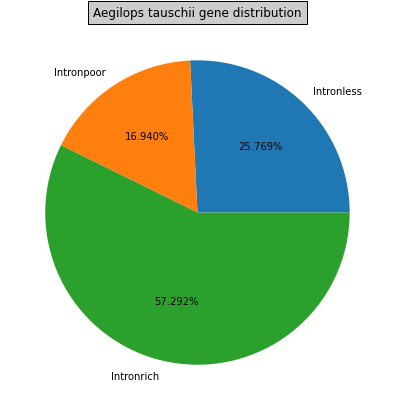

In [17]:
plotting_intron_types(10466, 6880, 23269, 'Aegilops tauschii gene distribution')

In [20]:
### --- Creating the list of a_tauschii gene IDs to check the number of transcripts using command line
intronless_file = open('Output/a_tauschii_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/a_tauschii_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/a_tauschii_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_a_tauschii)):
    if i == len(intronless_a_tauschii) -1:
        intronless_file.write(intronless_a_tauschii[i])
    else:
        intronless_file.write(intronless_a_tauschii[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_a_tauschii)):
    if i == len(intronpoor_a_tauschii) -1:
        intronpoor_file.write(intronpoor_a_tauschii[i])
    else:
        intronpoor_file.write(intronpoor_a_tauschii[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_a_tauschii)):
    if i == len(intronrich_a_tauschii) -1:
        intronrich_file.write(intronrich_a_tauschii[i])
    else:
        intronrich_file.write(intronrich_a_tauschii[i]+'\n')
intronrich_file.close()


# Asparagus officinalis Ensembl 52

In [24]:
### --- Function to count introns within a dataframe made of exons formatted like exon_a_officinalis
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('-')[0]] = counts.get(i.split(';')[1].split('-')[0], 0) + 1
    return counts

In [21]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_a_officinalis = pd.read_csv('Data/Asparagus_officinalis.Aspof.V1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_a_officinalis[df_a_officinalis['type']==('gene')]

,chr,source,type,start,end,score,strand,phase,attributes
21,1,ena,gene,50706.0,59390.0,.,-,.,ID=gene:A4U43_C01F80;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C01F80;logic_name=ena
32,1,ena,gene,71531.0,73581.0,.,-,.,ID=gene:A4U43_C01F90;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C01F90;logic_name=ena
46,1,ena,gene,81924.0,87018.0,.,+,.,ID=gene:A4U43_C01F100;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C01F100;logic_name=ena
56,1,ena,gene,89374.0,91591.0,.,-,.,ID=gene:A4U43_C01F110;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C01F110;logic_name=ena
63,1,ena,gene,94597.0,99069.0,.,+,.,ID=gene:A4U43_C01F120;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C01F120;logic_name=ena
...,...,...,...,...,...,...,...,...,...
348840,9,ena,gene,68430840.0,68437281.0,.,-,.,ID=gene:A4U43_C09F16850;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C09F16850;logic_name=ena
348853,9,ena,gene,68473005.0,68482498.0,.,-,.,ID=gene:A4U43_C09F16880;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C09F16880;logic_name=ena
348862,9,ena,gene,68482719.0,68483096.0,.,-,.,ID=gene:A4U43_C09F16890;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C09F16890;logic_name=ena
348867,9,ena,gene,68493426.0,68494315.0,.,-,.,ID=gene:A4U43_C09F16900;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C09F16900;logic_name=ena


In [22]:
### --- Building a separate dataframe containing all exons
exon_a_officinalis = df_a_officinalis.loc[df_a_officinalis['type'].isin(['exon'])]
exon_a_officinalis.iloc[:30, :]

,chr,source,type,start,end,score,strand,phase,attributes
19,1,ena,exon,48010.0,48081.0,.,-,.,Parent=transcript:EPlT00053344526;Name=A4U43_Asn86-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=A4U43_Asn86-1;rank=1
23,1,ena,exon,50706.0,50821.0,.,-,.,Parent=transcript:ONK78837;Name=ONK78837-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=ONK78837-3;rank=3
25,1,ena,exon,59108.0,59239.0,.,-,.,Parent=transcript:ONK78837;Name=ONK78837-2;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=ONK78837-2;rank=2
27,1,ena,exon,59306.0,59390.0,.,-,.,Parent=transcript:ONK78837;Name=ONK78837-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=ONK78837-1;rank=1
34,1,ena,exon,71531.0,71675.0,.,-,.,Parent=transcript:ONK78838;Name=ONK78838-5;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=ONK78838-5;rank=5
36,1,ena,exon,72284.0,72624.0,.,-,.,Parent=transcript:ONK78838;Name=ONK78838-4;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=ONK78838-4;rank=4
38,1,ena,exon,72807.0,72989.0,.,-,.,Parent=transcript:ONK78838;Name=ONK78838-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=ONK78838-3;rank=3
40,1,ena,exon,73087.0,73241.0,.,-,.,Parent=transcript:ONK78838;Name=ONK78838-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=ONK78838-2;rank=2
42,1,ena,exon,73443.0,73581.0,.,-,.,Parent=transcript:ONK78838;Name=ONK78838-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=ONK78838-1;rank=1
48,1,ena,exon,81924.0,81938.0,.,+,.,Parent=transcript:ONK78839;Name=ONK78839-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=ONK78839-1;rank=1


In [23]:
### --- Exporting the exon dataframe to a tsv file 
exon_a_officinalis.to_csv('Data/Asparagus_officinalis.Aspof.V1.52.chr_EXON',sep='\t',index=False,header=False)

In [25]:
### --- Counting introns type
introns_dictionary_a_officinalis = counting_introns_type(exon_a_officinalis)

In [26]:
n_intronless_a_officinalis, n_intronpoor_a_officinalis, n_intronrich_a_officinalis, intronless_a_officinalis, intronpoor_a_officinalis, intronrich_a_officinalis = splitting_introns_type(introns_dictionary_a_officinalis)

Intronless are: 3956
Intronpoor are: 10717
Intronrich are: 9030


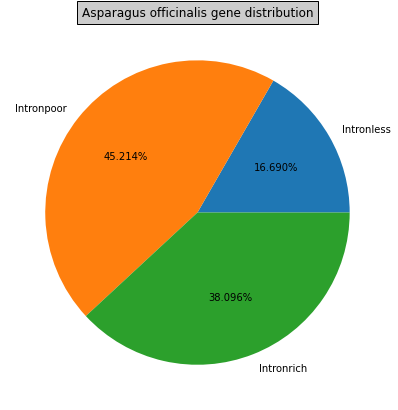

In [27]:
plotting_intron_types(3956, 10717, 9030, 'Asparagus officinalis gene distribution')

In [28]:
### --- Creating the list of a_officinalis gene IDs to check the number of transcripts using command line
intronless_file = open('Output/a_officinalis_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/a_officinalis_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/a_officinalis_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_a_officinalis)):
    if i == len(intronless_a_officinalis) -1:
        intronless_file.write(intronless_a_officinalis[i])
    else:
        intronless_file.write(intronless_a_officinalis[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_a_officinalis)):
    if i == len(intronpoor_a_officinalis) -1:
        intronpoor_file.write(intronpoor_a_officinalis[i])
    else:
        intronpoor_file.write(intronpoor_a_officinalis[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_a_officinalis)):
    if i == len(intronrich_a_officinalis) -1:
        intronrich_file.write(intronrich_a_officinalis[i])
    else:
        intronrich_file.write(intronrich_a_officinalis[i]+'\n')
intronrich_file.close()


# Brachypodium distachyon Ensembl 52

In [33]:
### --- Function to count introns within a dataframe made of exons formatted like exon_b_distachyon
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0]] = counts.get(i.split(';')[0], 0) + 1
    return counts

In [30]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_b_distachyon = pd.read_csv('Data/Brachypodium_distachyon.Brachypodium_distachyon_v3.0.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_b_distachyon[df_b_distachyon['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
13,1,ena,gene,10581.0,11638.0,.,+,.,ID=gene:BRADI_1g00200v3;biotype=protein_coding;description=hypothetical protein;gene_id=BRADI_1g00200v3;logic_name=ena
20,1,ena,gene,18453.0,21742.0,.,+,.,ID=gene:BRADI_1g00210v3;biotype=protein_coding;description=hypothetical protein;gene_id=BRADI_1g00210v3;logic_name=ena
46,1,ena,gene,28710.0,31462.0,.,-,.,ID=gene:BRADI_1g00213v3;biotype=protein_coding;description=hypothetical protein;gene_id=BRADI_1g00213v3;logic_name=ena
61,1,ena,gene,47522.0,49251.0,.,+,.,ID=gene:BRADI_1g00215v3;biotype=protein_coding;description=hypothetical protein;gene_id=BRADI_1g00215v3;logic_name=ena
74,1,ena,gene,52489.0,52869.0,.,+,.,ID=gene:BRADI_1g00217v3;biotype=protein_coding;description=hypothetical protein;gene_id=BRADI_1g00217v3;logic_name=ena
...,...,...,...,...,...,...,...,...,...
775063,5,ena,gene,28592762.0,28593901.0,.,-,.,ID=gene:BRADI_5g27710v3;biotype=protein_coding;description=hypothetical protein;gene_id=BRADI_5g27710v3;logic_name=ena
775075,5,ena,gene,28610990.0,28618695.0,.,-,.,ID=gene:BRADI_5g27720v3;biotype=protein_coding;description=hypothetical protein;gene_id=BRADI_5g27720v3;logic_name=ena
775220,5,ena,gene,28615691.0,28624002.0,.,+,.,ID=gene:BRADI_5g27920v3;biotype=protein_coding;description=hypothetical protein;gene_id=BRADI_5g27920v3;logic_name=ena
775229,5,ena,gene,28625233.0,28627340.0,.,+,.,ID=gene:BRADI_5g28020v3;biotype=protein_coding;description=hypothetical protein;gene_id=BRADI_5g28020v3;logic_name=ena


In [31]:
### --- Building a separate dataframe containing all exons
exon_b_distachyon = df_b_distachyon.loc[df_b_distachyon['type'].isin(['exon'])]
exon_b_distachyon.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
15,1,ena,exon,10581.0,10850.0,.,+,.,Parent=transcript:KQK11859;Name=KQK11859-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KQK11859-1;rank=1
17,1,ena,exon,11252.0,11638.0,.,+,.,Parent=transcript:KQK11859;Name=KQK11859-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KQK11859-2;rank=2
23,1,ena,exon,18453.0,18628.0,.,+,.,Parent=transcript:KQK11861;Name=KQK11861-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQK11861-1;rank=1
25,1,ena,exon,18726.0,18773.0,.,+,.,Parent=transcript:KQK11861;Name=KQK11861-2;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=KQK11861-2;rank=2
27,1,ena,exon,19132.0,19176.0,.,+,.,Parent=transcript:KQK11861;Name=KQK11861-3;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=KQK11861-3;rank=3
29,1,ena,exon,19327.0,19446.0,.,+,.,Parent=transcript:KQK11861;Name=KQK11861-4;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=KQK11861-4;rank=4
31,1,ena,exon,19750.0,19895.0,.,+,.,Parent=transcript:KQK11861;Name=KQK11861-5;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=KQK11861-5;rank=5
33,1,ena,exon,20030.0,20177.0,.,+,.,Parent=transcript:KQK11861;Name=KQK11861-6;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQK11861-6;rank=6
35,1,ena,exon,20599.0,20682.0,.,+,.,Parent=transcript:KQK11861;Name=KQK11861-7;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=KQK11861-7;rank=7
37,1,ena,exon,20787.0,20902.0,.,+,.,Parent=transcript:KQK11861;Name=KQK11861-8;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=KQK11861-8;rank=8


In [32]:
### --- Exporting the exon dataframe to a tsv file 
exon_b_distachyon.to_csv('Data/Brachypodium_distachyon.Brachypodium_distachyon_v3.0.52.chr_EXON',sep='\t',index=False,header=False)

In [34]:
### --- Counting introns type
introns_dictionary_b_distachyon = counting_introns_type(exon_b_distachyon)

In [35]:
n_intronless_b_distachyon, n_intronpoor_b_distachyon, n_intronrich_b_distachyon, intronless_b_distachyon, intronpoor_b_distachyon, intronrich_b_distachyon = splitting_introns_type(introns_dictionary_b_distachyon)

Intronless are: 11118
Intronpoor are: 20796
Intronrich are: 21857


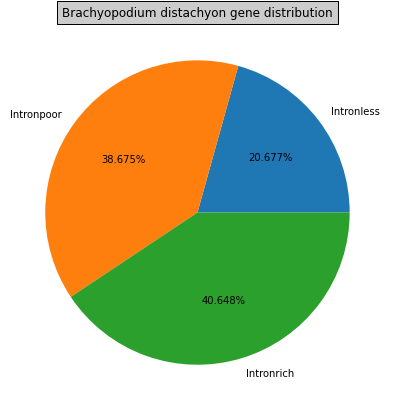

In [36]:
plotting_intron_types(11118, 20796, 21857, 'Brachyopodium distachyon gene distribution')

In [37]:
### --- Creating the list of b_distachyon gene IDs to check the number of transcripts using command line
intronless_file = open('Output/b_distachyon_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/b_distachyon_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/b_distachyon_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_b_distachyon)):
    if i == len(intronless_b_distachyon) -1:
        intronless_file.write(intronless_b_distachyon[i])
    else:
        intronless_file.write(intronless_b_distachyon[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_b_distachyon)):
    if i == len(intronpoor_b_distachyon) -1:
        intronpoor_file.write(intronpoor_b_distachyon[i])
    else:
        intronpoor_file.write(intronpoor_b_distachyon[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_b_distachyon)):
    if i == len(intronrich_b_distachyon) -1:
        intronrich_file.write(intronrich_b_distachyon[i])
    else:
        intronrich_file.write(intronrich_b_distachyon[i]+'\n')
intronrich_file.close()


# Dioscorea rotundata Ensembl 52

In [40]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [38]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_d_rotundata = pd.read_csv('Data/Dioscorea_rotundata.TDr96_F1_v2_PseudoChromosome.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_d_rotundata[df_d_rotundata['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
35,1,v2.0,gene,5586.0,8877.0,.,+,.,ID=gene:DRNTG_29170;biotype=protein_coding;gene_id=DRNTG_29170;logic_name=gff3_genes
49,1,v2.0,gene,8975.0,9777.0,.,+,.,ID=gene:DRNTG_29169;biotype=protein_coding;gene_id=DRNTG_29169;logic_name=gff3_genes
60,1,v2.0,gene,25220.0,29704.0,.,+,.,ID=gene:DRNTG_11860;biotype=protein_coding;gene_id=DRNTG_11860;logic_name=gff3_genes
73,1,v2.0,gene,34311.0,45457.0,.,+,.,ID=gene:DRNTG_11859;biotype=protein_coding;gene_id=DRNTG_11859;logic_name=gff3_genes
169,1,v2.0,gene,46616.0,58054.0,.,+,.,ID=gene:DRNTG_11858;biotype=protein_coding;gene_id=DRNTG_11858;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
828199,9,v2.0,gene,31067327.0,31069388.0,.,-,.,ID=gene:DRNTG_34148;biotype=protein_coding;gene_id=DRNTG_34148;logic_name=gff3_genes
828215,9,v2.0,gene,31074032.0,31076068.0,.,-,.,ID=gene:DRNTG_34149;biotype=protein_coding;gene_id=DRNTG_34149;logic_name=gff3_genes
828228,9,v2.0,gene,31076933.0,31078304.0,.,-,.,ID=gene:DRNTG_34150;biotype=protein_coding;gene_id=DRNTG_34150;logic_name=gff3_genes
828246,9,v2.0,gene,31078703.0,31079673.0,.,-,.,ID=gene:DRNTG_34151;biotype=protein_coding;gene_id=DRNTG_34151;logic_name=gff3_genes


In [39]:
### --- Building a separate dataframe containing all exons
exon_d_rotundata = df_d_rotundata.loc[df_d_rotundata['type'].isin(['exon'])]
exon_d_rotundata.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
37,1,v2.0,exon,5586.0,5638.0,.,+,.,Parent=transcript:DRNTG_29170.1;Name=DRNTG_29170.1-E1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=DRNTG_29170.1-E1;rank=1
39,1,v2.0,exon,5821.0,5865.0,.,+,.,Parent=transcript:DRNTG_29170.1;Name=DRNTG_29170.1-E2;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=DRNTG_29170.1-E2;rank=2
41,1,v2.0,exon,7473.0,7602.0,.,+,.,Parent=transcript:DRNTG_29170.1;Name=DRNTG_29170.1-E3;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=DRNTG_29170.1-E3;rank=3
43,1,v2.0,exon,8498.0,8680.0,.,+,.,Parent=transcript:DRNTG_29170.1;Name=DRNTG_29170.1-E4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=DRNTG_29170.1-E4;rank=4
46,1,v2.0,exon,8791.0,8877.0,.,+,.,Parent=transcript:DRNTG_29170.1;Name=DRNTG_29170.1-E5;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=DRNTG_29170.1-E5;rank=5
51,1,v2.0,exon,8975.0,9169.0,.,+,.,Parent=transcript:DRNTG_29169.1;Name=DRNTG_29169.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=DRNTG_29169.1-E1;rank=1
53,1,v2.0,exon,9315.0,9585.0,.,+,.,Parent=transcript:DRNTG_29169.1;Name=DRNTG_29169.1-E2;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=DRNTG_29169.1-E2;rank=2
56,1,v2.0,exon,9683.0,9777.0,.,+,.,Parent=transcript:DRNTG_29169.1;Name=DRNTG_29169.1-E3;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=DRNTG_29169.1-E3;rank=3
62,1,v2.0,exon,25220.0,25294.0,.,+,.,Parent=transcript:DRNTG_11860.1;Name=DRNTG_11860.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=DRNTG_11860.1-E1;rank=1
64,1,v2.0,exon,27027.0,27082.0,.,+,.,Parent=transcript:DRNTG_11860.1;Name=DRNTG_11860.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=DRNTG_11860.1-E2;rank=2


In [41]:
### --- Exporting the exon dataframe to a tsv file 
exon_d_rotundata.to_csv('Data/Dioscorea_rotundata.TDr96_F1_v2_PseudoChromosome.52.chr_EXON',sep='\t',index=False,header=False)

In [43]:
### --- Counting introns type
introns_dictionary_d_rotundata = counting_introns_type(exon_d_rotundata)

In [44]:
n_intronless_d_rotundata, n_intronpoor_d_rotundata, n_intronrich_d_rotundata, intronless_d_rotundata, intronpoor_d_rotundata, intronrich_d_rotundata = splitting_introns_type(introns_dictionary_d_rotundata)

Intronless are: 3620
Intronpoor are: 12638
Intronrich are: 14851


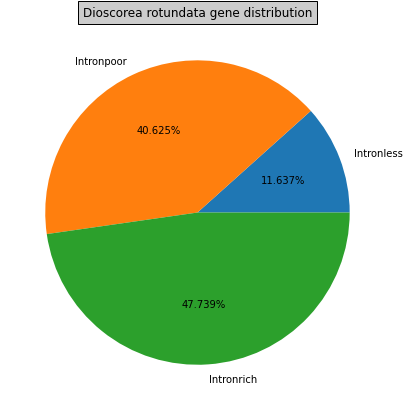

In [45]:
plotting_intron_types(3620, 12638, 14851, 'Dioscorea rotundata gene distribution')

In [46]:
### --- Creating the list of d_rotundata gene IDs to check the number of transcripts using command line
intronless_file = open('Output/d_rotundata_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/d_rotundata_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/d_rotundata_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_d_rotundata)):
    if i == len(intronless_d_rotundata) -1:
        intronless_file.write(intronless_d_rotundata[i])
    else:
        intronless_file.write(intronless_d_rotundata[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_d_rotundata)):
    if i == len(intronpoor_d_rotundata) -1:
        intronpoor_file.write(intronpoor_d_rotundata[i])
    else:
        intronpoor_file.write(intronpoor_d_rotundata[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_d_rotundata)):
    if i == len(intronrich_d_rotundata) -1:
        intronrich_file.write(intronrich_d_rotundata[i])
    else:
        intronrich_file.write(intronrich_d_rotundata[i]+'\n')
intronrich_file.close()


# Eragrostis curvula

In [49]:
### --- Function to count introns within a dataframe made of exons formatted like exon_e_curvula
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0]] = counts.get(i.split(';')[0], 0) + 1
    return counts

In [47]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_e_curvula = pd.read_csv('Data/Eragrostis_curvula.CERZOS_E.curvula1.0.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_e_curvula[df_e_curvula['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
14,1,ena,gene,4561.0,4988.0,.,-,.,ID=gene:EJB05_19047;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_19047;logic_name=ena
23,1,ena,gene,56286.0,58540.0,.,-,.,ID=gene:EJB05_19048;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_19048;logic_name=ena
33,1,ena,gene,71821.0,72624.0,.,-,.,ID=gene:EJB05_19046;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_19046;logic_name=ena
46,1,ena,gene,164683.0,166175.0,.,-,.,ID=gene:EJB05_19049;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_19049;logic_name=ena
55,1,ena,gene,176996.0,177970.0,.,-,.,ID=gene:EJB05_19054;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_19054;logic_name=ena
...,...,...,...,...,...,...,...,...,...
451676,7,ena,gene,42324557.0,42327665.0,.,-,.,ID=gene:EJB05_36898;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_36898;logic_name=ena
451687,7,ena,gene,42327712.0,42330985.0,.,-,.,ID=gene:EJB05_36895;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_36895;logic_name=ena
451702,7,ena,gene,42341688.0,42342647.0,.,-,.,ID=gene:EJB05_36897;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_36897;logic_name=ena
451711,7,ena,gene,42344803.0,42347939.0,.,-,.,ID=gene:EJB05_36896;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_36896;logic_name=ena


In [48]:
### --- Building a separate dataframe containing all exons
exon_e_curvula = df_e_curvula.loc[df_e_curvula['type'].isin(['exon'])]
exon_e_curvula.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
16,1,ena,exon,4561.0,4731.0,.,-,.,Parent=transcript:TVU27558;Name=TVU27558-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU27558-2;rank=2
19,1,ena,exon,4856.0,4988.0,.,-,.,Parent=transcript:TVU27558;Name=TVU27558-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU27558-1;rank=1
25,1,ena,exon,56286.0,56294.0,.,-,.,Parent=transcript:TVU27559;Name=TVU27559-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU27559-3;rank=3
27,1,ena,exon,56470.0,56586.0,.,-,.,Parent=transcript:TVU27559;Name=TVU27559-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU27559-2;rank=2
30,1,ena,exon,58216.0,58540.0,.,-,.,Parent=transcript:TVU27559;Name=TVU27559-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU27559-1;rank=1
36,1,ena,exon,71821.0,72141.0,.,-,.,Parent=transcript:TVU27557;Name=TVU27557-2;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TVU27557-2;rank=2
39,1,ena,exon,72455.0,72624.0,.,-,.,Parent=transcript:TVU27557;Name=TVU27557-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TVU27557-1;rank=1
44,1,ena,exon,127099.0,127171.0,.,+,.,Parent=transcript:EPlT00050765646;Name=EJB05_19050-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=EJB05_19050-1;rank=1
48,1,ena,exon,164683.0,164916.0,.,-,.,Parent=transcript:TVU27560;Name=TVU27560-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU27560-3;rank=3
50,1,ena,exon,165140.0,165419.0,.,-,.,Parent=transcript:TVU27560;Name=TVU27560-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TVU27560-2;rank=2


In [50]:
### --- Exporting the exon dataframe to a tsv file 
exon_e_curvula.to_csv('Data/Eragrostis_curvula.CERZOS_E.curvula1.0.52.chr_EXON',sep='\t',index=False,header=False)

In [51]:
### --- Counting introns type
introns_dictionary_e_curvula = counting_introns_type(exon_e_curvula)

In [52]:
n_intronless_e_curvula, n_intronpoor_e_curvula, n_intronrich_e_curvula, intronless_e_curvula, intronpoor_e_curvula, intronrich_e_curvula = splitting_introns_type(introns_dictionary_e_curvula)

Intronless are: 4356
Intronpoor are: 17586
Intronrich are: 11887


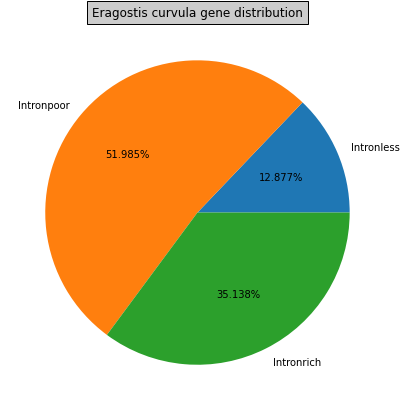

In [53]:
plotting_intron_types(4356, 17586, 11887, 'Eragostis curvula gene distribution')

In [54]:
### --- Creating the list of e_curvula gene IDs to check the number of transcripts using command line
intronless_file = open('Output/e_curvula_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/e_curvula_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/e_curvula_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_e_curvula)):
    if i == len(intronless_e_curvula) -1:
        intronless_file.write(intronless_e_curvula[i])
    else:
        intronless_file.write(intronless_e_curvula[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_e_curvula)):
    if i == len(intronpoor_e_curvula) -1:
        intronpoor_file.write(intronpoor_e_curvula[i])
    else:
        intronpoor_file.write(intronpoor_e_curvula[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_e_curvula)):
    if i == len(intronrich_e_curvula) -1:
        intronrich_file.write(intronrich_e_curvula[i])
    else:
        intronrich_file.write(intronrich_e_curvula[i]+'\n')
intronrich_file.close()


# Hordeum vulgare Morex Ensembl 52

In [59]:
### --- Function to count introns within a dataframe made of exons formatted like exon_Hv_goldenpromise
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts['.'.join(i.split('.')[:4])] = counts.get('.'.join(i.split('.')[:4]), 0) + 1
    return counts

In [55]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_Hv_morex = pd.read_csv('Data/Hordeum_vulgare.MorexV3_pseudomolecules_assembly.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_Hv_morex[df_Hv_morex['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
15,1H,IPK,gene,76744.0,77373.0,.,+,.,ID=gene:HORVU.MOREX.r3.1HG0000030;biotype=protein_coding;gene_id=HORVU.MOREX.r3.1HG0000030;logic_name=ipk_genes_hc
20,1H,IPK,gene,78284.0,81892.0,.,-,.,ID=gene:HORVU.MOREX.r3.1HG0000040;biotype=protein_coding;gene_id=HORVU.MOREX.r3.1HG0000040;logic_name=ipk_genes_hc
45,1H,IPK,gene,84091.0,87063.0,.,-,.,ID=gene:HORVU.MOREX.r3.1HG0000050;biotype=protein_coding;description=E3 ubiquitin-protein ligase SIS3 [Source:Projected from Arabidopsis thaliana (AT3G47990) UniProtKB/Swiss-Prot%3BAcc:Q8GYT9];gene_id=HORVU.MOREX.r3.1HG0000050;logic_name=ipk_genes_hc
66,1H,IPK,gene,132221.0,138736.0,.,+,.,ID=gene:HORVU.MOREX.r3.1HG0000060;biotype=protein_coding;gene_id=HORVU.MOREX.r3.1HG0000060;logic_name=ipk_genes_hc
113,1H,IPK,gene,146607.0,148562.0,.,+,.,ID=gene:HORVU.MOREX.r3.1HG0000070;biotype=protein_coding;gene_id=HORVU.MOREX.r3.1HG0000070;logic_name=ipk_genes_hc
...,...,...,...,...,...,...,...,...,...
478664,7H,IPK,gene,632132745.0,632137995.0,.,-,.,ID=gene:HORVU.MOREX.r3.7HG0752940;biotype=protein_coding;gene_id=HORVU.MOREX.r3.7HG0752940;logic_name=ipk_genes_hc
478705,7H,IPK,gene,632142712.0,632147465.0,.,-,.,ID=gene:HORVU.MOREX.r3.7HG0752950;biotype=protein_coding;gene_id=HORVU.MOREX.r3.7HG0752950;logic_name=ipk_genes_hc
478724,7H,IPK,gene,632164012.0,632169399.0,.,-,.,ID=gene:HORVU.MOREX.r3.7HG0752960;biotype=protein_coding;gene_id=HORVU.MOREX.r3.7HG0752960;logic_name=ipk_genes_hc
478755,7H,IPK,gene,632256502.0,632257275.0,.,+,.,ID=gene:HORVU.MOREX.r3.7HG0752970;biotype=protein_coding;gene_id=HORVU.MOREX.r3.7HG0752970;logic_name=ipk_genes_hc


In [57]:
df_Hv_morex[df_Hv_morex['attributes'].str.contains("ipk_genes_hc", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
15,1H,IPK,gene,76744.0,77373.0,.,+,.,ID=gene:HORVU.MOREX.r3.1HG0000030;biotype=protein_coding;gene_id=HORVU.MOREX.r3.1HG0000030;logic_name=ipk_genes_hc
20,1H,IPK,gene,78284.0,81892.0,.,-,.,ID=gene:HORVU.MOREX.r3.1HG0000040;biotype=protein_coding;gene_id=HORVU.MOREX.r3.1HG0000040;logic_name=ipk_genes_hc
45,1H,IPK,gene,84091.0,87063.0,.,-,.,ID=gene:HORVU.MOREX.r3.1HG0000050;biotype=protein_coding;description=E3 ubiquitin-protein ligase SIS3 [Source:Projected from Arabidopsis thaliana (AT3G47990) UniProtKB/Swiss-Prot%3BAcc:Q8GYT9];gene_id=HORVU.MOREX.r3.1HG0000050;logic_name=ipk_genes_hc
66,1H,IPK,gene,132221.0,138736.0,.,+,.,ID=gene:HORVU.MOREX.r3.1HG0000060;biotype=protein_coding;gene_id=HORVU.MOREX.r3.1HG0000060;logic_name=ipk_genes_hc
113,1H,IPK,gene,146607.0,148562.0,.,+,.,ID=gene:HORVU.MOREX.r3.1HG0000070;biotype=protein_coding;gene_id=HORVU.MOREX.r3.1HG0000070;logic_name=ipk_genes_hc
...,...,...,...,...,...,...,...,...,...
478664,7H,IPK,gene,632132745.0,632137995.0,.,-,.,ID=gene:HORVU.MOREX.r3.7HG0752940;biotype=protein_coding;gene_id=HORVU.MOREX.r3.7HG0752940;logic_name=ipk_genes_hc
478705,7H,IPK,gene,632142712.0,632147465.0,.,-,.,ID=gene:HORVU.MOREX.r3.7HG0752950;biotype=protein_coding;gene_id=HORVU.MOREX.r3.7HG0752950;logic_name=ipk_genes_hc
478724,7H,IPK,gene,632164012.0,632169399.0,.,-,.,ID=gene:HORVU.MOREX.r3.7HG0752960;biotype=protein_coding;gene_id=HORVU.MOREX.r3.7HG0752960;logic_name=ipk_genes_hc
478755,7H,IPK,gene,632256502.0,632257275.0,.,+,.,ID=gene:HORVU.MOREX.r3.7HG0752970;biotype=protein_coding;gene_id=HORVU.MOREX.r3.7HG0752970;logic_name=ipk_genes_hc


All high confidence

In [58]:
### --- Building a separate dataframe containing all exons
exon_Hv_morex = df_Hv_morex.loc[df_Hv_morex['type'].isin(['exon'])]
exon_Hv_morex.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
17,1H,IPK,exon,76744.0,77373.0,.,+,.,Parent=transcript:HORVU.MOREX.r3.1HG0000030.1;Name=HORVU.MOREX.r3.1HG0000030.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.1HG0000030.1-E1;rank=1
23,1H,IPK,exon,78284.0,78954.0,.,-,.,Parent=transcript:HORVU.MOREX.r3.1HG0000040.1;Name=HORVU.MOREX.r3.1HG0000040.1-E10;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=HORVU.MOREX.r3.1HG0000040.1-E10;rank=10
25,1H,IPK,exon,79063.0,79104.0,.,-,.,Parent=transcript:HORVU.MOREX.r3.1HG0000040.1;Name=HORVU.MOREX.r3.1HG0000040.1-E9;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.1HG0000040.1-E9;rank=9
27,1H,IPK,exon,79609.0,79676.0,.,-,.,Parent=transcript:HORVU.MOREX.r3.1HG0000040.1;Name=HORVU.MOREX.r3.1HG0000040.1-E8;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=HORVU.MOREX.r3.1HG0000040.1-E8;rank=8
29,1H,IPK,exon,79757.0,79799.0,.,-,.,Parent=transcript:HORVU.MOREX.r3.1HG0000040.1;Name=HORVU.MOREX.r3.1HG0000040.1-E7;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=HORVU.MOREX.r3.1HG0000040.1-E7;rank=7
31,1H,IPK,exon,79901.0,79932.0,.,-,.,Parent=transcript:HORVU.MOREX.r3.1HG0000040.1;Name=HORVU.MOREX.r3.1HG0000040.1-E6;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=HORVU.MOREX.r3.1HG0000040.1-E6;rank=6
33,1H,IPK,exon,80485.0,80655.0,.,-,.,Parent=transcript:HORVU.MOREX.r3.1HG0000040.1;Name=HORVU.MOREX.r3.1HG0000040.1-E5;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=HORVU.MOREX.r3.1HG0000040.1-E5;rank=5
35,1H,IPK,exon,80834.0,81011.0,.,-,.,Parent=transcript:HORVU.MOREX.r3.1HG0000040.1;Name=HORVU.MOREX.r3.1HG0000040.1-E4;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=HORVU.MOREX.r3.1HG0000040.1-E4;rank=4
37,1H,IPK,exon,81097.0,81297.0,.,-,.,Parent=transcript:HORVU.MOREX.r3.1HG0000040.1;Name=HORVU.MOREX.r3.1HG0000040.1-E3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.1HG0000040.1-E3;rank=3
39,1H,IPK,exon,81405.0,81595.0,.,-,.,Parent=transcript:HORVU.MOREX.r3.1HG0000040.1;Name=HORVU.MOREX.r3.1HG0000040.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=HORVU.MOREX.r3.1HG0000040.1-E2;rank=2


In [60]:
### --- Exporting the exon dataframe to a tsv file 
exon_Hv_morex.to_csv('Data/Hordeum_vulgare.MorexV3_pseudomolecules_assembly.52.chr_EXON',sep='\t',index=False,header=False)

In [62]:
### --- Counting introns type
introns_dictionary_Hv_morex = counting_introns_type(exon_Hv_morex)

In [63]:
n_intronless_Hv_morex, n_intronpoor_Hv_morex, n_intronrich_Hv_morex, intronless_Hv_morex, intronpoor_Hv_morex, intronrich_Hv_morex = splitting_introns_type(introns_dictionary_Hv_morex)

Intronless are: 11113
Intronpoor are: 12717
Intronrich are: 11276


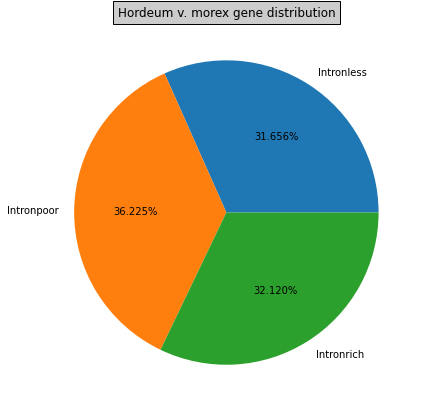

In [64]:
plotting_intron_types(11113, 12717, 11276, 'Hordeum v. morex gene distribution')

In [65]:
### --- Creating the list of Hv_morex gene IDs to check the number of transcripts using command line
intronless_file = open('Output/Hv_morex_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/Hv_morex_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/Hv_morex_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_Hv_morex)):
    if i == len(intronless_Hv_morex) -1:
        intronless_file.write(intronless_Hv_morex[i])
    else:
        intronless_file.write(intronless_Hv_morex[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_Hv_morex)):
    if i == len(intronpoor_Hv_morex) -1:
        intronpoor_file.write(intronpoor_Hv_morex[i])
    else:
        intronpoor_file.write(intronpoor_Hv_morex[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_Hv_morex)):
    if i == len(intronrich_Hv_morex) -1:
        intronrich_file.write(intronrich_Hv_morex[i])
    else:
        intronrich_file.write(intronrich_Hv_morex[i]+'\n')
intronrich_file.close()


# Oryza brachyantha Ensembl 52

In [71]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [66]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_brachyantha = pd.read_csv('Data/Oryza_brachyantha.Oryza_brachyantha.v1.4b.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_brachyantha[df_o_brachyantha['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
19,1,oge,gene,14456.0,23022.0,.,+,.,ID=gene:OB01G10010;biotype=protein_coding;gene_id=OB01G10010;logic_name=genemodel_v1.4_oge
48,1,oge,gene,47693.0,50341.0,.,+,.,ID=gene:OB01G10020;biotype=protein_coding;description=SKU5 similar 3 [Source:Projected from Arabidopsis thaliana (AT5G48450) TAIR%3BAcc:AT5G48450];gene_id=OB01G10020;logic_name=genemodel_v1.4_oge
61,1,oge,gene,52502.0,57481.0,.,+,.,ID=gene:OB01G10030;biotype=protein_coding;gene_id=OB01G10030;logic_name=genemodel_v1.4_oge
80,1,oge,gene,60240.0,64549.0,.,+,.,ID=gene:OB01G10040;biotype=protein_coding;gene_id=OB01G10040;logic_name=genemodel_v1.4_oge
99,1,oge,gene,65674.0,69835.0,.,+,.,ID=gene:OB01G10050;biotype=protein_coding;gene_id=OB01G10050;logic_name=genemodel_v1.4_oge
...,...,...,...,...,...,...,...,...,...
423930,9,oge,gene,14077593.0,14083328.0,.,+,.,ID=gene:OB09G27270;biotype=protein_coding;description=Protein of unknown function (DUF3550/UPF0682) [Source:Projected from Arabidopsis thaliana (AT3G03570) TAIR%3BAcc:AT3G03570];gene_id=OB09G27270;logic_name=genemodel_v1.4_oge
423953,9,oge,gene,14084791.0,14091469.0,.,-,.,ID=gene:OB09G27280;biotype=protein_coding;gene_id=OB09G27280;logic_name=genemodel_v1.4_oge
423970,9,oge,gene,14094046.0,14096256.0,.,-,.,ID=gene:OB09G27290;biotype=protein_coding;gene_id=OB09G27290;logic_name=genemodel_v1.4_oge
423983,9,oge,gene,14097870.0,14103850.0,.,+,.,ID=gene:OB09G27300;biotype=protein_coding;gene_id=OB09G27300;logic_name=genemodel_v1.4_oge


In [67]:
### --- Building a separate dataframe containing all exons
exon_o_brachyantha = df_o_brachyantha.loc[df_o_brachyantha['type'].isin(['exon'])]
exon_o_brachyantha.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
21,1,oge,exon,14456.0,15152.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=OB01G10010.1.exon1;rank=1
23,1,oge,exon,15281.0,15306.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=OB01G10010.1.exon2;rank=2
25,1,oge,exon,15307.0,15471.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OB01G10010.1.exon3;rank=3
27,1,oge,exon,16308.0,16406.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OB01G10010.1.exon4;rank=4
29,1,oge,exon,16987.0,17090.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon5;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=OB01G10010.1.exon5;rank=5
31,1,oge,exon,19079.0,19887.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon6;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=OB01G10010.1.exon6;rank=6
33,1,oge,exon,19967.0,20089.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon7;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=OB01G10010.1.exon7;rank=7
35,1,oge,exon,20170.0,20258.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon8;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=OB01G10010.1.exon8;rank=8
37,1,oge,exon,20346.0,20546.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon9;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OB01G10010.1.exon9;rank=9
39,1,oge,exon,21194.0,21610.0,.,+,.,Parent=transcript:OB01G10010.1;Name=OB01G10010.1.exon10;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OB01G10010.1.exon10;rank=10


In [68]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_brachyantha.to_csv('Data/Oryza_brachyantha.Oryza_brachyantha.v1.4b.52.chr_EXON',sep='\t',index=False,header=False)

In [72]:
### --- Counting introns type
introns_dictionary_o_brachyantha = counting_introns_type(exon_o_brachyantha)

In [73]:
n_intronless_o_brachyantha, n_intronpoor_o_brachyantha, n_intronrich_o_brachyantha, intronless_o_brachyantha, intronpoor_o_brachyantha, intronrich_o_brachyantha = splitting_introns_type(introns_dictionary_o_brachyantha)

Intronless are: 9103
Intronpoor are: 9732
Intronrich are: 12908


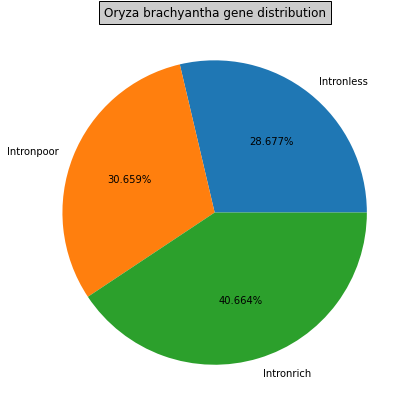

In [74]:
plotting_intron_types(9103, 9732, 12908, 'Oryza brachyantha gene distribution')

In [75]:
### --- Creating the list of o_brachyantha gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_brachyantha_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_brachyantha_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_brachyantha_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_brachyantha)):
    if i == len(intronless_o_brachyantha) -1:
        intronless_file.write(intronless_o_brachyantha[i])
    else:
        intronless_file.write(intronless_o_brachyantha[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_brachyantha)):
    if i == len(intronpoor_o_brachyantha) -1:
        intronpoor_file.write(intronpoor_o_brachyantha[i])
    else:
        intronpoor_file.write(intronpoor_o_brachyantha[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_brachyantha)):
    if i == len(intronrich_o_brachyantha) -1:
        intronrich_file.write(intronrich_o_brachyantha[i])
    else:
        intronrich_file.write(intronrich_o_brachyantha[i]+'\n')
intronrich_file.close()


# Oryza glaberrima Ensembl 2

In [79]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [76]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_glaberrima = pd.read_csv('Data/Oryza_glaberrima.Oryza_glaberrima_V1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_glaberrima[df_o_glaberrima['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
19,1,pgsb,gene,2.0,4194.0,.,+,.,ID=gene:ORGLA01G0000100;biotype=protein_coding;description=dihydrosphingosine phosphate lyase [Source:Projected from Arabidopsis thaliana (AT1G27980) TAIR%3BAcc:AT1G27980];gene_id=ORGLA01G0000100;logic_name=mips_oglab_v2.01
46,1,pgsb,gene,9088.0,9981.0,.,+,.,ID=gene:ORGLA01G0000200;biotype=protein_coding;gene_id=ORGLA01G0000200;logic_name=mips_oglab_v2.01
51,1,pgsb,gene,10664.0,13096.0,.,+,.,ID=gene:ORGLA01G0000300;biotype=protein_coding;description=Pentatricopeptide repeat (PPR) superfamily protein [Source:Projected from Arabidopsis thaliana (AT3G02010) TAIR%3BAcc:AT3G02010];gene_id=ORGLA01G0000300;logic_name=mips_oglab_v2.01
56,1,pgsb,gene,14127.0,15368.0,.,+,.,ID=gene:ORGLA01G0000400;biotype=protein_coding;gene_id=ORGLA01G0000400;logic_name=mips_oglab_v2.01
67,1,pgsb,gene,15693.0,17974.0,.,-,.,ID=gene:ORGLA01G0000500;biotype=protein_coding;gene_id=ORGLA01G0000500;logic_name=mips_oglab_v2.01
...,...,...,...,...,...,...,...,...,...
354693,9,pgsb,gene,17582253.0,17584581.0,.,-,.,ID=gene:ORGLA09G0170900;biotype=protein_coding;gene_id=ORGLA09G0170900;logic_name=mips_oglab_v2.01
354704,9,pgsb,gene,17587010.0,17589400.0,.,-,.,ID=gene:ORGLA09G0171000;biotype=protein_coding;gene_id=ORGLA09G0171000;logic_name=mips_oglab_v2.01
354709,9,pgsb,gene,17592071.0,17593876.0,.,-,.,ID=gene:ORGLA09G0171100;biotype=protein_coding;gene_id=ORGLA09G0171100;logic_name=mips_oglab_v2.01
354718,9,pgsb,gene,17596528.0,17596683.0,.,+,.,ID=gene:ORGLA09G0171200;biotype=protein_coding;gene_id=ORGLA09G0171200;logic_name=mips_oglab_v2.01


In [77]:
### --- Building a separate dataframe containing all exons
exon_o_glaberrima = df_o_glaberrima.loc[df_o_glaberrima['type'].isin(['exon'])]
exon_o_glaberrima.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
21,1,pgsb,exon,2.0,63.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=ORGLA01G0000100.1.exon1;rank=1
23,1,pgsb,exon,780.0,1004.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon2;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=ORGLA01G0000100.1.exon2;rank=2
25,1,pgsb,exon,1078.0,1219.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon3;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=ORGLA01G0000100.1.exon3;rank=3
27,1,pgsb,exon,1463.0,1513.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=ORGLA01G0000100.1.exon4;rank=4
29,1,pgsb,exon,1621.0,1712.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon5;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=ORGLA01G0000100.1.exon5;rank=5
31,1,pgsb,exon,2506.0,2632.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon6;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=ORGLA01G0000100.1.exon6;rank=6
33,1,pgsb,exon,2740.0,2755.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon7;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=ORGLA01G0000100.1.exon7;rank=7
35,1,pgsb,exon,3126.0,3233.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon8;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=ORGLA01G0000100.1.exon8;rank=8
37,1,pgsb,exon,3322.0,3376.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon9;constitutive=1;ensembl_end_phase=2;ensembl_phase=1;exon_id=ORGLA01G0000100.1.exon9;rank=9
39,1,pgsb,exon,3643.0,3789.0,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon10;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=ORGLA01G0000100.1.exon10;rank=10


In [78]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_glaberrima.to_csv('Data/Oryza_glaberrima.Oryza_glaberrima_V1.52.chr_EXON',sep='\t',index=False,header=False)

In [80]:
### --- Counting introns type
introns_dictionary_o_glaberrima = counting_introns_type(exon_o_glaberrima)

In [81]:
n_intronless_o_glaberrima, n_intronpoor_o_glaberrima, n_intronrich_o_glaberrima, intronless_o_glaberrima, intronpoor_o_glaberrima, intronrich_o_glaberrima = splitting_introns_type(introns_dictionary_o_glaberrima)

Intronless are: 9266
Intronpoor are: 11760
Intronrich are: 9591


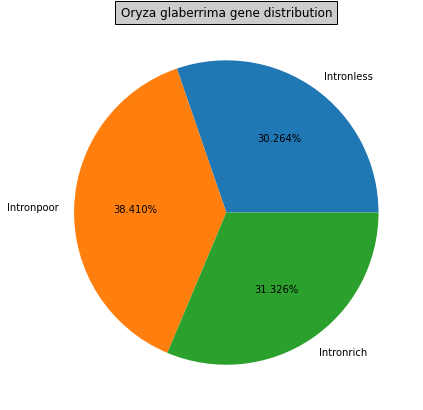

In [82]:
plotting_intron_types(9266, 11760,9591 , 'Oryza glaberrima gene distribution')

In [83]:
### --- Creating the list of o_glaberrima gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_glaberrima_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_glaberrima_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_glaberrima_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_glaberrima)):
    if i == len(intronless_o_glaberrima) -1:
        intronless_file.write(intronless_o_glaberrima[i])
    else:
        intronless_file.write(intronless_o_glaberrima[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_glaberrima)):
    if i == len(intronpoor_o_glaberrima) -1:
        intronpoor_file.write(intronpoor_o_glaberrima[i])
    else:
        intronpoor_file.write(intronpoor_o_glaberrima[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_glaberrima)):
    if i == len(intronrich_o_glaberrima) -1:
        intronrich_file.write(intronrich_o_glaberrima[i])
    else:
        intronrich_file.write(intronrich_o_glaberrima[i]+'\n')
intronrich_file.close()


# Panicum hallii v2 Ensembl 52

In [86]:
### --- Function to count introns within a dataframe made of exons formatted like exon_p_halliiv2
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0]] = counts.get(i.split(';')[0], 0) + 1
    return counts

In [84]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_p_halliiv2 = pd.read_csv('Data/Panicum_hallii.PhalliiHAL_v2.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_p_halliiv2[df_p_halliiv2['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
16,1,ena,gene,14202.0,17135.0,.,+,.,ID=gene:GQ55_1G000100;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_1G000100;logic_name=ena
31,1,ena,gene,16321.0,23563.0,.,-,.,ID=gene:GQ55_1G000200;biotype=protein_coding;description=PDIL1-3 [Source:Projected from Arabidopsis thaliana (AT3G54960) UniProtKB/TrEMBL%3BAcc:A0A178VF09];gene_id=GQ55_1G000200;logic_name=ena
58,1,ena,gene,44240.0,48034.0,.,+,.,ID=gene:GQ55_1G000300;biotype=protein_coding;description=FAM10 family protein At4g22670 [Source:Projected from Arabidopsis thaliana (AT4G22670) UniProtKB/Swiss-Prot%3BAcc:Q93YR3];gene_id=GQ55_1G000300;logic_name=ena
85,1,ena,gene,48536.0,49174.0,.,+,.,ID=gene:GQ55_1G000400;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_1G000400;logic_name=ena
90,1,ena,gene,49566.0,49836.0,.,+,.,ID=gene:GQ55_1G000500;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_1G000500;logic_name=ena
...,...,...,...,...,...,...,...,...,...
603866,9,ena,gene,71012405.0,71013941.0,.,+,.,ID=gene:GQ55_9G652700;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_9G652700;logic_name=ena
603873,9,ena,gene,71022719.0,71025685.0,.,+,.,ID=gene:GQ55_9G652800;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_9G652800;logic_name=ena
603917,9,ena,gene,71025697.0,71027246.0,.,-,.,ID=gene:GQ55_9G652900;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_9G652900;logic_name=ena
603924,9,ena,gene,71058489.0,71060289.0,.,-,.,ID=gene:GQ55_9G653000;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_9G653000;logic_name=ena


In [85]:
### --- Building a separate dataframe containing all exons
exon_p_halliiv2 = df_p_halliiv2.loc[df_p_halliiv2['type'].isin(['exon'])]
exon_p_halliiv2.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
19,1,ena,exon,14202.0,14855.0,.,+,.,Parent=transcript:PUZ73606;Name=PUZ73606-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PUZ73606-1;rank=1
21,1,ena,exon,14945.0,15292.0,.,+,.,Parent=transcript:PUZ73606;Name=PUZ73606-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PUZ73606-2;rank=2
23,1,ena,exon,15372.0,15980.0,.,+,.,Parent=transcript:PUZ73606;Name=PUZ73606-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PUZ73606-3;rank=3
25,1,ena,exon,16078.0,16248.0,.,+,.,Parent=transcript:PUZ73606;Name=PUZ73606-4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PUZ73606-4;rank=4
28,1,ena,exon,16318.0,17135.0,.,+,.,Parent=transcript:PUZ73606;Name=PUZ73606-5;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=PUZ73606-5;rank=5
34,1,ena,exon,16321.0,17138.0,.,-,.,Parent=transcript:PUZ73605;Name=PUZ73605-11;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=PUZ73605-11;rank=11
36,1,ena,exon,17268.0,17324.0,.,-,.,Parent=transcript:PUZ73605;Name=PUZ73605-10;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PUZ73605-10;rank=10
38,1,ena,exon,18849.0,18983.0,.,-,.,Parent=transcript:PUZ73605;Name=PUZ73605-9;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PUZ73605-9;rank=9
40,1,ena,exon,19260.0,19340.0,.,-,.,Parent=transcript:PUZ73605;Name=PUZ73605-8;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PUZ73605-8;rank=8
42,1,ena,exon,19427.0,19495.0,.,-,.,Parent=transcript:PUZ73605;Name=PUZ73605-7;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PUZ73605-7;rank=7


In [87]:
### --- Exporting the exon dataframe to a tsv file 
exon_p_halliiv2.to_csv('Data/Panicum_hallii.PhalliiHAL_v2.1.52.chr_EXON',sep='\t',index=False,header=False)

In [89]:
### --- Counting introns type
introns_dictionary_p_halliiv2 = counting_introns_type(exon_p_halliiv2)

In [90]:
n_intronless_p_halliiv2, n_intronpoor_p_halliiv2, n_intronrich_p_halliiv2, intronless_p_halliiv2, intronpoor_p_halliiv2, intronrich_p_halliiv2 = splitting_introns_type(introns_dictionary_p_halliiv2)

Intronless are: 10682
Intronpoor are: 15423
Intronrich are: 16401


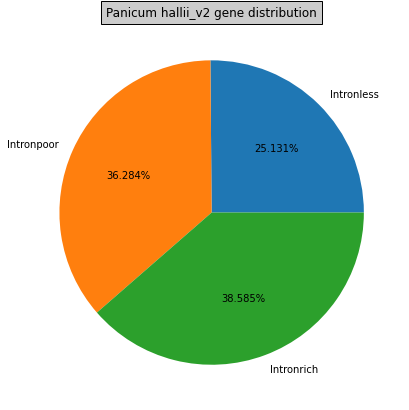

In [91]:
plotting_intron_types(10682, 15423, 16401, 'Panicum hallii_v2 gene distribution')

In [92]:
### --- Creating the list of p_halliiv2 gene IDs to check the number of transcripts using command line
intronless_file = open('Output/p_halliiv2_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/p_halliiv2_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/p_halliiv2_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_p_halliiv2)):
    if i == len(intronless_p_halliiv2) -1:
        intronless_file.write(intronless_p_halliiv2[i])
    else:
        intronless_file.write(intronless_p_halliiv2[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_p_halliiv2)):
    if i == len(intronpoor_p_halliiv2) -1:
        intronpoor_file.write(intronpoor_p_halliiv2[i])
    else:
        intronpoor_file.write(intronpoor_p_halliiv2[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_p_halliiv2)):
    if i == len(intronrich_p_halliiv2) -1:
        intronrich_file.write(intronrich_p_halliiv2[i])
    else:
        intronrich_file.write(intronrich_p_halliiv2[i]+'\n')
intronrich_file.close()


# Panicum hallii v3 Ensembl 52

In [95]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0]] = counts.get(i.split(';')[0], 0) + 1
    return counts

In [93]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_p_halliiv3 = pd.read_csv('Data/Panicum_hallii_fil2.PHallii_v3.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_p_halliiv3[df_p_halliiv3['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
16,1,ena,gene,10253.0,14037.0,.,+,.,ID=gene:PAHAL_1G000100;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_1G000100;logic_name=ena
31,1,ena,gene,12339.0,19507.0,.,-,.,ID=gene:PAHAL_1G000200;biotype=protein_coding;description=PDIL1-3 [Source:Projected from Arabidopsis thaliana (AT3G54960) UniProtKB/TrEMBL%3BAcc:A0A178VF09];gene_id=PAHAL_1G000200;logic_name=ena
58,1,ena,gene,26741.0,30384.0,.,+,.,ID=gene:PAHAL_1G000300;biotype=protein_coding;description=FAM10 family protein At4g22670 [Source:Projected from Arabidopsis thaliana (AT4G22670) UniProtKB/Swiss-Prot%3BAcc:Q93YR3];gene_id=PAHAL_1G000300;logic_name=ena
85,1,ena,gene,31044.0,31679.0,.,+,.,ID=gene:PAHAL_1G000400;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_1G000400;logic_name=ena
90,1,ena,gene,33295.0,34839.0,.,+,.,ID=gene:PAHAL_1G000500;biotype=protein_coding;description=AT4G22880 protein [Source:Projected from Arabidopsis thaliana (AT4G22880) UniProtKB/TrEMBL%3BAcc:Q0WWD6];gene_id=PAHAL_1G000500;logic_name=ena
...,...,...,...,...,...,...,...,...,...
631908,9,ena,gene,73845619.0,73846654.0,.,+,.,ID=gene:PAHAL_9G642900;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_9G642900;logic_name=ena
631915,9,ena,gene,73849942.0,73856939.0,.,+,.,ID=gene:PAHAL_9G643000;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_9G643000;logic_name=ena
631938,9,ena,gene,73856951.0,73858491.0,.,-,.,ID=gene:PAHAL_9G643100;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_9G643100;logic_name=ena
631945,9,ena,gene,73889592.0,73891963.0,.,-,.,ID=gene:PAHAL_9G643200;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_9G643200;logic_name=ena


In [94]:
### --- Building a separate dataframe containing all exons
exon_p_halliiv3 = df_p_halliiv3.loc[df_p_halliiv3['type'].isin(['exon'])]
exon_p_halliiv3.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
19,1,ena,exon,10253.0,10874.0,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03506-1;rank=1
21,1,ena,exon,10964.0,11311.0,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03506-2;rank=2
23,1,ena,exon,11390.0,11998.0,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03506-3;rank=3
25,1,ena,exon,12096.0,12266.0,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03506-4;rank=4
28,1,ena,exon,12336.0,14037.0,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-5;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=PAN03506-5;rank=5
34,1,ena,exon,12339.0,13155.0,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-11;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=PAN03505-11;rank=11
36,1,ena,exon,13285.0,13341.0,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-10;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03505-10;rank=10
38,1,ena,exon,14867.0,15001.0,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-9;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03505-9;rank=9
40,1,ena,exon,15271.0,15351.0,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-8;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03505-8;rank=8
42,1,ena,exon,15438.0,15506.0,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-7;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03505-7;rank=7


In [96]:
### --- Exporting the exon dataframe to a tsv file 
exon_p_halliiv3.to_csv('Data/Panicum_hallii_fil2.PHallii_v3.1.52.chr_EXON',sep='\t',index=False,header=False)

In [97]:
### --- Counting introns type
introns_dictionary_p_halliiv3 = counting_introns_type(exon_p_halliiv3)

In [98]:
n_intronless_p_halliiv3, n_intronpoor_p_halliiv3, n_intronrich_p_halliiv3, intronless_p_halliiv3, intronpoor_p_halliiv3, intronrich_p_halliiv3 = splitting_introns_type(introns_dictionary_p_halliiv3)

Intronless are: 10732
Intronpoor are: 15938
Intronrich are: 17389


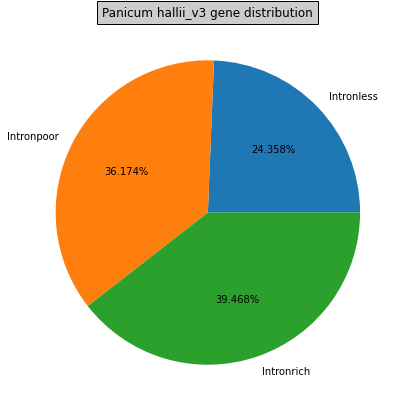

In [99]:
plotting_intron_types(10732, 15938, 17389, 'Panicum hallii_v3 gene distribution')

In [100]:
### --- Creating the list of p_halliiv3 gene IDs to check the number of transcripts using command line
intronless_file = open('Output/p_halliiv3_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/p_halliiv3_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/p_halliiv3_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_p_halliiv3)):
    if i == len(intronless_p_halliiv3) -1:
        intronless_file.write(intronless_p_halliiv3[i])
    else:
        intronless_file.write(intronless_p_halliiv3[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_p_halliiv3)):
    if i == len(intronpoor_p_halliiv3) -1:
        intronpoor_file.write(intronpoor_p_halliiv3[i])
    else:
        intronpoor_file.write(intronpoor_p_halliiv3[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_p_halliiv3)):
    if i == len(intronrich_p_halliiv3) -1:
        intronrich_file.write(intronrich_p_halliiv3[i])
    else:
        intronrich_file.write(intronrich_p_halliiv3[i]+'\n')
intronrich_file.close()


# Setaria italica Ensembl 52

In [103]:
### --- Function to count introns within a dataframe made of exons formatted like exon_s_italica
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0]] = counts.get(i.split(';')[0], 0) + 1
    return counts

In [101]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_s_italica = pd.read_csv('Data/Setaria_italica.Setaria_italica_v2.0.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_s_italica[df_s_italica['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
17,I,ena,gene,10197.0,13618.0,.,+,.,ID=gene:SETIT_016158mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_016158mg;logic_name=ena
26,I,ena,gene,55108.0,57492.0,.,+,.,ID=gene:SETIT_018185mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_018185mg;logic_name=ena
41,I,ena,gene,74818.0,77420.0,.,+,.,ID=gene:SETIT_017130mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_017130mg;logic_name=ena
57,I,ena,gene,76162.0,82041.0,.,-,.,ID=gene:SETIT_016761mg;biotype=protein_coding;description=PDIL1-3 [Source:Projected from Arabidopsis thaliana (AT3G54960) UniProtKB/TrEMBL%3BAcc:A0A178VF09];gene_id=SETIT_016761mg;logic_name=ena
105,I,ena,gene,82225.0,86187.0,.,+,.,ID=gene:SETIT_020621mg;biotype=protein_coding;description=FAM10 family protein At4g22670 [Source:Projected from Arabidopsis thaliana (AT4G22670) UniProtKB/Swiss-Prot%3BAcc:Q93YR3];gene_id=SETIT_020621mg;logic_name=ena
...,...,...,...,...,...,...,...,...,...
547036,VIII,ena,gene,40610189.0,40613055.0,.,+,.,ID=gene:SETIT_026769mg;biotype=protein_coding;description=GDSL esterase/lipase CPRD49 [Source:Projected from Arabidopsis thaliana (AT3G11210) UniProtKB/Swiss-Prot%3BAcc:Q9SRM5];gene_id=SETIT_026769mg;logic_name=ena
547068,VIII,ena,gene,40613527.0,40614497.0,.,+,.,ID=gene:SETIT_027491mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_027491mg;logic_name=ena
547075,VIII,ena,gene,40615104.0,40624281.0,.,-,.,ID=gene:SETIT_026031mg;biotype=protein_coding;description=RECQ helicase L2 [Source:Projected from Arabidopsis thaliana (AT1G31360) TAIR%3BAcc:AT1G31360];gene_id=SETIT_026031mg;logic_name=ena
547123,VIII,ena,gene,40643212.0,40644123.0,.,-,.,ID=gene:SETIT_027112mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_027112mg;logic_name=ena


In [102]:
### --- Building a separate dataframe containing all exons
exon_s_italica = df_s_italica.loc[df_s_italica['type'].isin(['exon'])]
exon_s_italica.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
19,I,ena,exon,10197.0,13134.0,.,+,.,Parent=transcript:KQL27674;Name=KQL27674-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQL27674-1;rank=1
21,I,ena,exon,13242.0,13618.0,.,+,.,Parent=transcript:KQL27674;Name=KQL27674-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=KQL27674-2;rank=2
29,I,ena,exon,55108.0,55372.0,.,+,.,Parent=transcript:KQL27675;Name=KQL27675-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQL27675-1;rank=1
31,I,ena,exon,56363.0,56499.0,.,+,.,Parent=transcript:KQL27675;Name=KQL27675-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=KQL27675-2;rank=2
33,I,ena,exon,56589.0,56675.0,.,+,.,Parent=transcript:KQL27675;Name=KQL27675-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KQL27675-3;rank=3
35,I,ena,exon,56777.0,56935.0,.,+,.,Parent=transcript:KQL27675;Name=KQL27675-4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KQL27675-4;rank=4
38,I,ena,exon,57067.0,57492.0,.,+,.,Parent=transcript:KQL27675;Name=KQL27675-5;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KQL27675-5;rank=5
44,I,ena,exon,74818.0,76150.0,.,+,.,Parent=transcript:KQL27676;Name=KQL27676-1;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=KQL27676-1;rank=1
46,I,ena,exon,76236.0,76406.0,.,+,.,Parent=transcript:KQL27676;Name=KQL27676-2;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=KQL27676-2;rank=2
49,I,ena,exon,76471.0,77420.0,.,+,.,Parent=transcript:KQL27676;Name=KQL27676-3;constitutive=0;ensembl_end_phase=2;ensembl_phase=0;exon_id=KQL27676-3;rank=3


In [104]:
### --- Exporting the exon dataframe to a tsv file 
exon_s_italica.to_csv('Data/Setaria_italica.Setaria_italica_v2.0.52.chr_EXON',sep='\t',index=False,header=False)

In [105]:
### --- Counting introns type
introns_dictionary_s_italica = counting_introns_type(exon_s_italica)

In [106]:
n_intronless_s_italica, n_intronpoor_s_italica, n_intronrich_s_italica, intronless_s_italica, intronpoor_s_italica, intronrich_s_italica = splitting_introns_type(introns_dictionary_s_italica)

Intronless are: 11483
Intronpoor are: 15230
Intronrich are: 14737


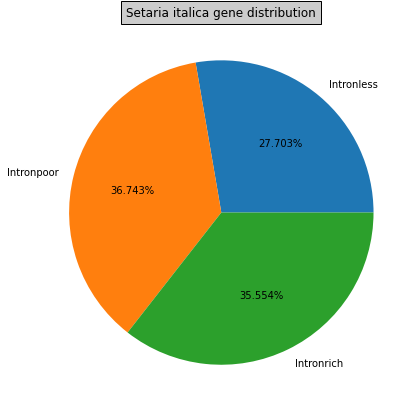

In [107]:
plotting_intron_types(11483, 15230, 14737, 'Setaria italica gene distribution')

In [108]:
### --- Creating the list of s_italica gene IDs to check the number of transcripts using command line
intronless_file = open('Output/s_italica_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/s_italica_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/s_italica_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_s_italica)):
    if i == len(intronless_s_italica) -1:
        intronless_file.write(intronless_s_italica[i])
    else:
        intronless_file.write(intronless_s_italica[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_s_italica)):
    if i == len(intronpoor_s_italica) -1:
        intronpoor_file.write(intronpoor_s_italica[i])
    else:
        intronpoor_file.write(intronpoor_s_italica[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_s_italica)):
    if i == len(intronrich_s_italica) -1:
        intronrich_file.write(intronrich_s_italica[i])
    else:
        intronrich_file.write(intronrich_s_italica[i]+'\n')
intronrich_file.close()


# Setaria viridis Ensembl 52

In [111]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0]] = counts.get(i.split(';')[0], 0) + 1
    return counts

In [109]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_s_viridis = pd.read_csv('Data/Setaria_viridis.Setaria_viridis_v2.0.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_s_viridis[df_s_viridis['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
16,1,ena,gene,1755.0,4225.0,.,+,.,ID=gene:SEVIR_1G000100v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_1G000100v2;logic_name=ena
31,1,ena,gene,34621.0,37252.0,.,+,.,ID=gene:SEVIR_1G000200v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_1G000200v2;logic_name=ena
51,1,ena,gene,34654.0,42181.0,.,-,.,ID=gene:SEVIR_1G000300v2;biotype=protein_coding;description=PDIL1-3 [Source:Projected from Arabidopsis thaliana (AT3G54960) UniProtKB/TrEMBL%3BAcc:A0A178VF09];gene_id=SEVIR_1G000300v2;logic_name=ena
78,1,ena,gene,42312.0,45821.0,.,+,.,ID=gene:SEVIR_1G000400v2;biotype=protein_coding;description=FAM10 family protein At4g22670 [Source:Projected from Arabidopsis thaliana (AT4G22670) UniProtKB/Swiss-Prot%3BAcc:Q93YR3];gene_id=SEVIR_1G000400v2;logic_name=ena
103,1,ena,gene,47313.0,47948.0,.,+,.,ID=gene:SEVIR_1G000501v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_1G000501v2;logic_name=ena
...,...,...,...,...,...,...,...,...,...
737186,9,ena,gene,56322521.0,56324390.0,.,-,.,ID=gene:SEVIR_9G583750v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_9G583750v2;logic_name=ena
737195,9,ena,gene,56325389.0,56328664.0,.,-,.,ID=gene:SEVIR_9G583800v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_9G583800v2;logic_name=ena
737202,9,ena,gene,56331663.0,56334951.0,.,+,.,ID=gene:SEVIR_9G583850v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_9G583850v2;logic_name=ena
737230,9,ena,gene,56346393.0,56347293.0,.,+,.,ID=gene:SEVIR_9G583900v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_9G583900v2;logic_name=ena


In [110]:
### --- Building a separate dataframe containing all exons
exon_s_viridis = df_s_viridis.loc[df_s_viridis['type'].isin(['exon'])]
exon_s_viridis.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
19,1,ena,exon,1755.0,2026.0,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TKW36712-1;rank=1
21,1,ena,exon,3016.0,3152.0,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TKW36712-2;rank=2
23,1,ena,exon,3242.0,3328.0,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36712-3;rank=3
25,1,ena,exon,3430.0,3588.0,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36712-4;rank=4
28,1,ena,exon,3720.0,4225.0,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-5;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TKW36712-5;rank=5
34,1,ena,exon,34621.0,36099.0,.,+,.,Parent=transcript:TKW36714;Name=TKW36714-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36714-1;rank=1
36,1,ena,exon,36185.0,36355.0,.,+,.,Parent=transcript:TKW36714;Name=TKW36714-2;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36714-2;rank=2
39,1,ena,exon,36420.0,37252.0,.,+,.,Parent=transcript:TKW36714;Name=TKW36714-3;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TKW36714-3;rank=3
43,1,ena,exon,34621.0,36099.0,.,+,.,Parent=transcript:TKW36713;Name=TKW36714-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36714-1;rank=1
45,1,ena,exon,36185.0,36289.0,.,+,.,Parent=transcript:TKW36713;Name=TKW36713-2;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36713-2;rank=2


In [112]:
### --- Exporting the exon dataframe to a tsv file 
exon_s_viridis.to_csv('Data/Setaria_viridis.Setaria_viridis_v2.0.52.chr_EXON',sep='\t',index=False,header=False)

In [113]:
### --- Counting introns type
introns_dictionary_s_viridis = counting_introns_type(exon_s_viridis)

In [114]:
n_intronless_s_viridis, n_intronpoor_s_viridis, n_intronrich_s_viridis, intronless_s_viridis, intronpoor_s_viridis, intronrich_s_viridis = splitting_introns_type(introns_dictionary_s_viridis)

Intronless are: 12674
Intronpoor are: 19845
Intronrich are: 19936


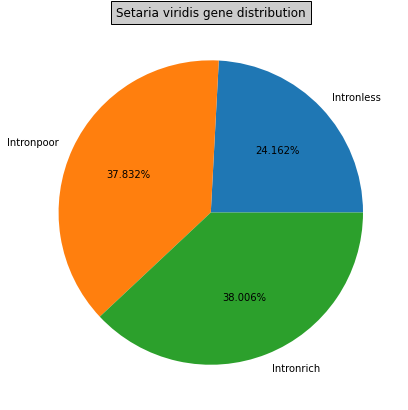

In [115]:
plotting_intron_types(12674, 19845, 19936, 'Setaria viridis gene distribution')

In [116]:
### --- Creating the list of s_viridis gene IDs to check the number of transcripts using command line
intronless_file = open('Output/s_viridis_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/s_viridis_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/s_viridis_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_s_viridis)):
    if i == len(intronless_s_viridis) -1:
        intronless_file.write(intronless_s_viridis[i])
    else:
        intronless_file.write(intronless_s_viridis[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_s_viridis)):
    if i == len(intronpoor_s_viridis) -1:
        intronpoor_file.write(intronpoor_s_viridis[i])
    else:
        intronpoor_file.write(intronpoor_s_viridis[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_s_viridis)):
    if i == len(intronrich_s_viridis) -1:
        intronrich_file.write(intronrich_s_viridis[i])
    else:
        intronrich_file.write(intronrich_s_viridis[i]+'\n')
intronrich_file.close()


# Sorghum bicolor Ensembl 52

In [121]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0]] = counts.get(i.split(';')[0], 0) + 1
    return counts

In [119]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_s_bicolor = pd.read_csv('Data/Sorghum_bicolor.Sorghum_bicolor_NCBIv3.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_s_bicolor[df_s_bicolor['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
18,1,ena,gene,1951.0,2616.0,.,+,.,ID=gene:SORBI_3001G000100;biotype=protein_coding;description=hypothetical protein;gene_id=SORBI_3001G000100;logic_name=ena
25,1,ena,gene,11180.0,14899.0,.,-,.,ID=gene:SORBI_3001G000200;biotype=protein_coding;description=hypothetical protein;gene_id=SORBI_3001G000200;logic_name=ena
52,1,ena,gene,22391.0,42443.0,.,-,.,ID=gene:SORBI_3001G000400;biotype=protein_coding;description=hypothetical protein;gene_id=SORBI_3001G000400;logic_name=ena
298,1,ena,gene,23399.0,24152.0,.,-,.,ID=gene:SORBI_3001G000300;biotype=protein_coding;description=hypothetical protein;gene_id=SORBI_3001G000300;logic_name=ena
306,1,ena,gene,52891.0,53594.0,.,+,.,ID=gene:SORBI_3001G000501;biotype=protein_coding;description=hypothetical protein;gene_id=SORBI_3001G000501;logic_name=ena
...,...,...,...,...,...,...,...,...,...
672641,9,ena,gene,59367712.0,59370487.0,.,-,.,ID=gene:SORBI_3009G260600;biotype=protein_coding;description=hypothetical protein;gene_id=SORBI_3009G260600;logic_name=ena
672664,9,ena,gene,59380194.0,59382508.0,.,-,.,ID=gene:SORBI_3009G260650;biotype=protein_coding;description=hypothetical protein;gene_id=SORBI_3009G260650;logic_name=ena
672726,9,ena,gene,59383001.0,59398238.0,.,-,.,ID=gene:SORBI_3009G260700;biotype=protein_coding;description=hypothetical protein;gene_id=SORBI_3009G260700;logic_name=ena
672765,9,ena,gene,59389107.0,59389708.0,.,-,.,ID=gene:SORBI_3009G260800;biotype=protein_coding;description=hypothetical protein;gene_id=SORBI_3009G260800;logic_name=ena


In [120]:
### --- Building a separate dataframe containing all exons
exon_s_bicolor = df_s_bicolor.loc[df_s_bicolor['type'].isin(['exon'])]
exon_s_bicolor.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
20,1,ena,exon,1951.0,2454.0,.,+,.,Parent=transcript:EER90453;Name=EER90453-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=EER90453-1;rank=1
22,1,ena,exon,2473.0,2616.0,.,+,.,Parent=transcript:EER90453;Name=EER90453-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=EER90453-2;rank=2
28,1,ena,exon,11180.0,11531.0,.,-,.,Parent=transcript:EER93047;Name=EER93047-11;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=EER93047-11;rank=11
30,1,ena,exon,11649.0,11732.0,.,-,.,Parent=transcript:EER93047;Name=EER93047-10;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=EER93047-10;rank=10
32,1,ena,exon,11892.0,12152.0,.,-,.,Parent=transcript:EER93047;Name=EER93047-9;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=EER93047-9;rank=9
34,1,ena,exon,12689.0,12786.0,.,-,.,Parent=transcript:EER93047;Name=EER93047-8;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=EER93047-8;rank=8
36,1,ena,exon,12895.0,13000.0,.,-,.,Parent=transcript:EER93047;Name=EER93047-7;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=EER93047-7;rank=7
38,1,ena,exon,13094.0,13182.0,.,-,.,Parent=transcript:EER93047;Name=EER93047-6;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=EER93047-6;rank=6
40,1,ena,exon,13278.0,13400.0,.,-,.,Parent=transcript:EER93047;Name=EER93047-5;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=EER93047-5;rank=5
42,1,ena,exon,13637.0,13908.0,.,-,.,Parent=transcript:EER93047;Name=EER93047-4;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=EER93047-4;rank=4


In [122]:
### --- Exporting the exon dataframe to a tsv file 
exon_s_bicolor.to_csv('Data/Sorghum_bicolor.Sorghum_bicolor_NCBIv3.52.chr_EXON',sep='\t',index=False,header=False)

In [123]:
### --- Counting introns type
introns_dictionary_s_bicolor = counting_introns_type(exon_s_bicolor)

In [124]:
n_intronless_s_bicolor, n_intronpoor_s_bicolor, n_intronrich_s_bicolor, intronless_s_bicolor, intronpoor_s_bicolor, intronrich_s_bicolor = splitting_introns_type(introns_dictionary_s_bicolor)

Intronless are: 10974
Intronpoor are: 19064
Intronrich are: 18248


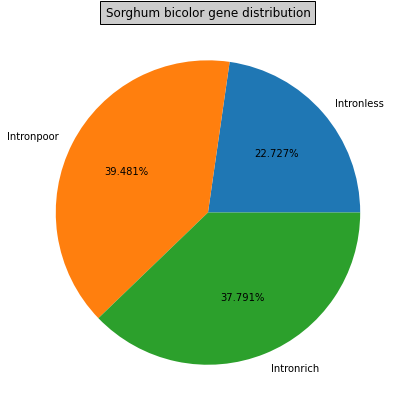

In [125]:
plotting_intron_types(10974, 19064, 18248, 'Sorghum bicolor gene distribution')

In [126]:
### --- Creating the list of s_bicolor gene IDs to check the number of transcripts using command line
intronless_file = open('Output/s_bicolor_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/s_bicolor_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/s_bicolor_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_s_bicolor)):
    if i == len(intronless_s_bicolor) -1:
        intronless_file.write(intronless_s_bicolor[i])
    else:
        intronless_file.write(intronless_s_bicolor[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_s_bicolor)):
    if i == len(intronpoor_s_bicolor) -1:
        intronpoor_file.write(intronpoor_s_bicolor[i])
    else:
        intronpoor_file.write(intronpoor_s_bicolor[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_s_bicolor)):
    if i == len(intronrich_s_bicolor) -1:
        intronrich_file.write(intronrich_s_bicolor[i])
    else:
        intronrich_file.write(intronrich_s_bicolor[i]+'\n')
intronrich_file.close()


# Triticum aestivum arinalrfor Ensembl 52

In [130]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [127]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_arinalrfor = pd.read_csv('Data/Triticum_aestivum_arinalrfor.PGSBv2.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_arinalrfor[df_t_aestivum_arinalrfor['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,84471.0,84787.0,.,+,.,ID=gene:TraesARI1A03G00000030;biotype=protein_coding;gene_id=TraesARI1A03G00000030;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,85485.0,86132.0,.,+,.,ID=gene:TraesARI1A03G00000040;biotype=protein_coding;gene_id=TraesARI1A03G00000040;logic_name=pgsb_genes_high_conf
41,1A,PGSB,gene,247572.0,248723.0,.,-,.,ID=gene:TraesARI1A03G00000160;biotype=protein_coding;gene_id=TraesARI1A03G00000160;logic_name=pgsb_genes_high_conf
50,1A,PGSB,gene,278788.0,285282.0,.,-,.,ID=gene:TraesARI1A03G00000190;biotype=protein_coding;gene_id=TraesARI1A03G00000190;logic_name=pgsb_genes_high_conf
65,1A,PGSB,gene,415063.0,415700.0,.,+,.,ID=gene:TraesARI1A03G00000230;biotype=protein_coding;gene_id=TraesARI1A03G00000230;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2355383,7D,PGSB,gene,642058135.0,642063482.0,.,-,.,ID=gene:TraesARI7D03G04573880;biotype=protein_coding;gene_id=TraesARI7D03G04573880;logic_name=pgsb_genes_high_conf
2355436,7D,PGSB,gene,642071746.0,642075976.0,.,+,.,ID=gene:TraesARI7D03G04573890;biotype=protein_coding;gene_id=TraesARI7D03G04573890;logic_name=pgsb_genes_high_conf
2355445,7D,PGSB,gene,642096265.0,642101341.0,.,-,.,ID=gene:TraesARI7D03G04573910;biotype=protein_coding;gene_id=TraesARI7D03G04573910;logic_name=pgsb_genes_high_conf
2355510,7D,PGSB,gene,642129313.0,642129630.0,.,+,.,ID=gene:TraesARI7D03G04573950;biotype=protein_coding;gene_id=TraesARI7D03G04573950;logic_name=pgsb_genes_high_conf


In [155]:
df_t_aestivum_arinalrfor[df_t_aestivum_arinalrfor['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,84471.0,84787.0,.,+,.,ID=gene:TraesARI1A03G00000030;biotype=protein_coding;gene_id=TraesARI1A03G00000030;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,85485.0,86132.0,.,+,.,ID=gene:TraesARI1A03G00000040;biotype=protein_coding;gene_id=TraesARI1A03G00000040;logic_name=pgsb_genes_high_conf
41,1A,PGSB,gene,247572.0,248723.0,.,-,.,ID=gene:TraesARI1A03G00000160;biotype=protein_coding;gene_id=TraesARI1A03G00000160;logic_name=pgsb_genes_high_conf
50,1A,PGSB,gene,278788.0,285282.0,.,-,.,ID=gene:TraesARI1A03G00000190;biotype=protein_coding;gene_id=TraesARI1A03G00000190;logic_name=pgsb_genes_high_conf
65,1A,PGSB,gene,415063.0,415700.0,.,+,.,ID=gene:TraesARI1A03G00000230;biotype=protein_coding;gene_id=TraesARI1A03G00000230;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2355383,7D,PGSB,gene,642058135.0,642063482.0,.,-,.,ID=gene:TraesARI7D03G04573880;biotype=protein_coding;gene_id=TraesARI7D03G04573880;logic_name=pgsb_genes_high_conf
2355436,7D,PGSB,gene,642071746.0,642075976.0,.,+,.,ID=gene:TraesARI7D03G04573890;biotype=protein_coding;gene_id=TraesARI7D03G04573890;logic_name=pgsb_genes_high_conf
2355445,7D,PGSB,gene,642096265.0,642101341.0,.,-,.,ID=gene:TraesARI7D03G04573910;biotype=protein_coding;gene_id=TraesARI7D03G04573910;logic_name=pgsb_genes_high_conf
2355510,7D,PGSB,gene,642129313.0,642129630.0,.,+,.,ID=gene:TraesARI7D03G04573950;biotype=protein_coding;gene_id=TraesARI7D03G04573950;logic_name=pgsb_genes_high_conf


All high conf

In [128]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_arinalrfor = df_t_aestivum_arinalrfor.loc[df_t_aestivum_arinalrfor['type'].isin(['exon'])]
exon_t_aestivum_arinalrfor.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
31,1A,PGSB,exon,84471.0,84787.0,.,+,.,Parent=transcript:TraesARI1A03G00000030.1;Name=TraesARI1A03G00000030.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesARI1A03G00000030.1-E1;rank=1
37,1A,PGSB,exon,85485.0,86132.0,.,+,.,Parent=transcript:TraesARI1A03G00000040.1;Name=TraesARI1A03G00000040.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesARI1A03G00000040.1-E1;rank=1
44,1A,PGSB,exon,247572.0,248435.0,.,-,.,Parent=transcript:TraesARI1A03G00000160.1;Name=TraesARI1A03G00000160.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesARI1A03G00000160.1-E2;rank=2
47,1A,PGSB,exon,248703.0,248723.0,.,-,.,Parent=transcript:TraesARI1A03G00000160.1;Name=TraesARI1A03G00000160.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesARI1A03G00000160.1-E1;rank=1
53,1A,PGSB,exon,278788.0,280042.0,.,-,.,Parent=transcript:TraesARI1A03G00000190.1;Name=TraesARI1A03G00000190.1-E5;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=TraesARI1A03G00000190.1-E5;rank=5
55,1A,PGSB,exon,280135.0,280284.0,.,-,.,Parent=transcript:TraesARI1A03G00000190.1;Name=TraesARI1A03G00000190.1-E4;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesARI1A03G00000190.1-E4;rank=4
57,1A,PGSB,exon,280641.0,281114.0,.,-,.,Parent=transcript:TraesARI1A03G00000190.1;Name=TraesARI1A03G00000190.1-E3;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesARI1A03G00000190.1-E3;rank=3
59,1A,PGSB,exon,281393.0,281995.0,.,-,.,Parent=transcript:TraesARI1A03G00000190.1;Name=TraesARI1A03G00000190.1-E2;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesARI1A03G00000190.1-E2;rank=2
62,1A,PGSB,exon,284955.0,285282.0,.,-,.,Parent=transcript:TraesARI1A03G00000190.1;Name=TraesARI1A03G00000190.1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesARI1A03G00000190.1-E1;rank=1
68,1A,PGSB,exon,415063.0,415260.0,.,+,.,Parent=transcript:TraesARI1A03G00000230.1;Name=TraesARI1A03G00000230.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesARI1A03G00000230.1-E1;rank=1


In [129]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_arinalrfor.to_csv('Data/Triticum_aestivum_arinalrfor.PGSBv2.1.52.chr_EXON',sep='\t',index=False,header=False)

In [131]:
### --- Counting introns type
introns_dictionary_t_aestivum_arinalrfor = counting_introns_type(exon_t_aestivum_arinalrfor)

In [132]:
n_intronless_t_aestivum_arinalrfor, n_intronpoor_t_aestivum_arinalrfor, n_intronrich_t_aestivum_arinalrfor, intronless_t_aestivum_arinalrfor, intronpoor_t_aestivum_arinalrfor, intronrich_t_aestivum_arinalrfor = splitting_introns_type(introns_dictionary_t_aestivum_arinalrfor)

Intronless are: 39595
Intronpoor are: 55718
Intronrich are: 46939


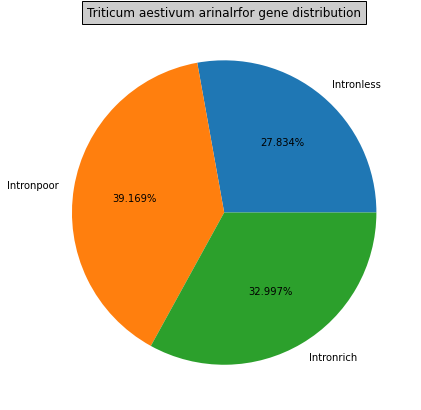

In [133]:
plotting_intron_types(39595, 55718, 46939, 'Triticum aestivum arinalrfor gene distribution')

In [134]:
### --- Creating the list of t_aestivum_arinalrfor gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_arinalrfor_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_arinalrfor_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_arinalrfor_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_arinalrfor)):
    if i == len(intronless_t_aestivum_arinalrfor) -1:
        intronless_file.write(intronless_t_aestivum_arinalrfor[i])
    else:
        intronless_file.write(intronless_t_aestivum_arinalrfor[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_arinalrfor)):
    if i == len(intronpoor_t_aestivum_arinalrfor) -1:
        intronpoor_file.write(intronpoor_t_aestivum_arinalrfor[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_arinalrfor[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_arinalrfor)):
    if i == len(intronrich_t_aestivum_arinalrfor) -1:
        intronrich_file.write(intronrich_t_aestivum_arinalrfor[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_arinalrfor[i]+'\n')
intronrich_file.close()


# Triticum aestivum jagger Ensembl 52

In [138]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [135]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_jagger = pd.read_csv('Data/Triticum_aestivum_jagger.PGSBv2.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_jagger[df_t_aestivum_jagger['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,12670.0,12973.0,.,+,.,ID=gene:TraesJAG1A03G00000070;biotype=protein_coding;gene_id=TraesJAG1A03G00000070;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,23037.0,23699.0,.,-,.,ID=gene:TraesJAG1A03G00000110;biotype=protein_coding;gene_id=TraesJAG1A03G00000110;logic_name=pgsb_genes_high_conf
42,1A,PGSB,gene,24648.0,24953.0,.,+,.,ID=gene:TraesJAG1A03G00000120;biotype=protein_coding;gene_id=TraesJAG1A03G00000120;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,41527.0,41832.0,.,+,.,ID=gene:TraesJAG1A03G00000170;biotype=protein_coding;gene_id=TraesJAG1A03G00000170;logic_name=pgsb_genes_high_conf
54,1A,PGSB,gene,48324.0,48761.0,.,-,.,ID=gene:TraesJAG1A03G00000190;biotype=protein_coding;gene_id=TraesJAG1A03G00000190;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2250075,7D,PGSB,gene,643203448.0,643209058.0,.,-,.,ID=gene:TraesJAG7D03G04480660;biotype=protein_coding;gene_id=TraesJAG7D03G04480660;logic_name=pgsb_genes_high_conf
2250111,7D,PGSB,gene,643217476.0,643221560.0,.,+,.,ID=gene:TraesJAG7D03G04480670;biotype=protein_coding;gene_id=TraesJAG7D03G04480670;logic_name=pgsb_genes_high_conf
2250120,7D,PGSB,gene,643242187.0,643247272.0,.,-,.,ID=gene:TraesJAG7D03G04480690;biotype=protein_coding;gene_id=TraesJAG7D03G04480690;logic_name=pgsb_genes_high_conf
2250162,7D,PGSB,gene,643275189.0,643276095.0,.,+,.,ID=gene:TraesJAG7D03G04480730;biotype=protein_coding;gene_id=TraesJAG7D03G04480730;logic_name=pgsb_genes_high_conf


In [156]:
df_t_aestivum_jagger[df_t_aestivum_jagger['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,12670.0,12973.0,.,+,.,ID=gene:TraesJAG1A03G00000070;biotype=protein_coding;gene_id=TraesJAG1A03G00000070;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,23037.0,23699.0,.,-,.,ID=gene:TraesJAG1A03G00000110;biotype=protein_coding;gene_id=TraesJAG1A03G00000110;logic_name=pgsb_genes_high_conf
42,1A,PGSB,gene,24648.0,24953.0,.,+,.,ID=gene:TraesJAG1A03G00000120;biotype=protein_coding;gene_id=TraesJAG1A03G00000120;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,41527.0,41832.0,.,+,.,ID=gene:TraesJAG1A03G00000170;biotype=protein_coding;gene_id=TraesJAG1A03G00000170;logic_name=pgsb_genes_high_conf
54,1A,PGSB,gene,48324.0,48761.0,.,-,.,ID=gene:TraesJAG1A03G00000190;biotype=protein_coding;gene_id=TraesJAG1A03G00000190;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2250075,7D,PGSB,gene,643203448.0,643209058.0,.,-,.,ID=gene:TraesJAG7D03G04480660;biotype=protein_coding;gene_id=TraesJAG7D03G04480660;logic_name=pgsb_genes_high_conf
2250111,7D,PGSB,gene,643217476.0,643221560.0,.,+,.,ID=gene:TraesJAG7D03G04480670;biotype=protein_coding;gene_id=TraesJAG7D03G04480670;logic_name=pgsb_genes_high_conf
2250120,7D,PGSB,gene,643242187.0,643247272.0,.,-,.,ID=gene:TraesJAG7D03G04480690;biotype=protein_coding;gene_id=TraesJAG7D03G04480690;logic_name=pgsb_genes_high_conf
2250162,7D,PGSB,gene,643275189.0,643276095.0,.,+,.,ID=gene:TraesJAG7D03G04480730;biotype=protein_coding;gene_id=TraesJAG7D03G04480730;logic_name=pgsb_genes_high_conf


All high conf

In [136]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_jagger = df_t_aestivum_jagger.loc[df_t_aestivum_jagger['type'].isin(['exon'])]
exon_t_aestivum_jagger.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
31,1A,PGSB,exon,12670.0,12973.0,.,+,.,Parent=transcript:TraesJAG1A03G00000070.1;Name=TraesJAG1A03G00000070.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesJAG1A03G00000070.1-E1;rank=1
36,1A,PGSB,exon,23037.0,23177.0,.,-,.,Parent=transcript:TraesJAG1A03G00000110.1;Name=TraesJAG1A03G00000110.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesJAG1A03G00000110.1-E2;rank=2
39,1A,PGSB,exon,23295.0,23699.0,.,-,.,Parent=transcript:TraesJAG1A03G00000110.1;Name=TraesJAG1A03G00000110.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesJAG1A03G00000110.1-E1;rank=1
45,1A,PGSB,exon,24648.0,24953.0,.,+,.,Parent=transcript:TraesJAG1A03G00000120.1;Name=TraesJAG1A03G00000120.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesJAG1A03G00000120.1-E1;rank=1
51,1A,PGSB,exon,41527.0,41832.0,.,+,.,Parent=transcript:TraesJAG1A03G00000170.1;Name=TraesJAG1A03G00000170.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesJAG1A03G00000170.1-E1;rank=1
57,1A,PGSB,exon,48324.0,48761.0,.,-,.,Parent=transcript:TraesJAG1A03G00000190.1;Name=TraesJAG1A03G00000190.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesJAG1A03G00000190.1-E1;rank=1
63,1A,PGSB,exon,58493.0,58798.0,.,+,.,Parent=transcript:TraesJAG1A03G00000240.1;Name=TraesJAG1A03G00000240.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesJAG1A03G00000240.1-E1;rank=1
69,1A,PGSB,exon,101561.0,101866.0,.,+,.,Parent=transcript:TraesJAG1A03G00000280.1;Name=TraesJAG1A03G00000280.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesJAG1A03G00000280.1-E1;rank=1
74,1A,PGSB,exon,116429.0,116569.0,.,-,.,Parent=transcript:TraesJAG1A03G00000300.2;Name=TraesJAG1A03G00000300.2-E2;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesJAG1A03G00000300.2-E2;rank=2
77,1A,PGSB,exon,116687.0,117091.0,.,-,.,Parent=transcript:TraesJAG1A03G00000300.2;Name=TraesJAG1A03G00000300.2-E1;constitutive=0;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesJAG1A03G00000300.2-E1;rank=1


In [137]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_jagger.to_csv('Data/Triticum_aestivum_jagger.PGSBv2.1.52.chr_EXON',sep='\t',index=False,header=False)

In [139]:
### --- Counting introns type
introns_dictionary_t_aestivum_jagger = counting_introns_type(exon_t_aestivum_jagger)

In [140]:
n_intronless_t_aestivum_jagger, n_intronpoor_t_aestivum_jagger, n_intronrich_t_aestivum_jagger, intronless_t_aestivum_jagger, intronpoor_t_aestivum_jagger, intronrich_t_aestivum_jagger = splitting_introns_type(introns_dictionary_t_aestivum_jagger)

Intronless are: 38959
Intronpoor are: 54662
Intronrich are: 45664


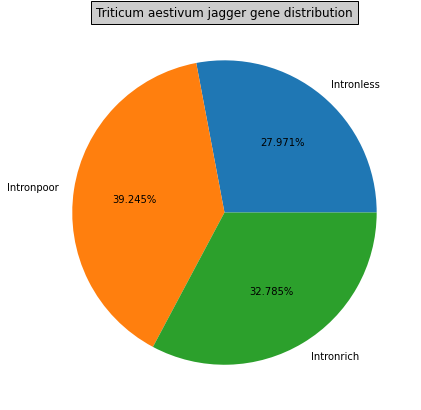

In [141]:
plotting_intron_types(38959, 54662, 45664, 'Triticum aestivum jagger gene distribution')

In [142]:
### --- Creating the list of t_aestivum_jagger gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_jagger_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_jagger_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_jagger_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_jagger)):
    if i == len(intronless_t_aestivum_jagger) -1:
        intronless_file.write(intronless_t_aestivum_jagger[i])
    else:
        intronless_file.write(intronless_t_aestivum_jagger[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_jagger)):
    if i == len(intronpoor_t_aestivum_jagger) -1:
        intronpoor_file.write(intronpoor_t_aestivum_jagger[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_jagger[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_jagger)):
    if i == len(intronrich_t_aestivum_jagger) -1:
        intronrich_file.write(intronrich_t_aestivum_jagger[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_jagger[i]+'\n')
intronrich_file.close()


# Triticum aestivum julius Ensembl 52

In [146]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [143]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_julius = pd.read_csv('Data/Triticum_aestivum_julius.PGSBv2.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_julius[df_t_aestivum_julius['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,4.0,6455.0,.,+,.,ID=gene:TraesJUL1A03G00000010;biotype=protein_coding;gene_id=TraesJUL1A03G00000010;logic_name=pgsb_genes_high_conf
51,1A,PGSB,gene,15307.0,17765.0,.,-,.,ID=gene:TraesJUL1A03G00000030;biotype=protein_coding;gene_id=TraesJUL1A03G00000030;logic_name=pgsb_genes_high_conf
62,1A,PGSB,gene,42706.0,46674.0,.,+,.,ID=gene:TraesJUL1A03G00000040;biotype=protein_coding;gene_id=TraesJUL1A03G00000040;logic_name=pgsb_genes_high_conf
75,1A,PGSB,gene,78759.0,82855.0,.,-,.,ID=gene:TraesJUL1A03G00000050;biotype=protein_coding;gene_id=TraesJUL1A03G00000050;logic_name=pgsb_genes_high_conf
102,1A,PGSB,gene,109095.0,116535.0,.,+,.,ID=gene:TraesJUL1A03G00000070;biotype=protein_coding;gene_id=TraesJUL1A03G00000070;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2430001,7D,PGSB,gene,642290116.0,642294325.0,.,-,.,ID=gene:TraesJUL7D03G04541640;biotype=protein_coding;gene_id=TraesJUL7D03G04541640;logic_name=pgsb_genes_high_conf
2430022,7D,PGSB,gene,642295854.0,642297075.0,.,-,.,ID=gene:TraesJUL7D03G04541650;biotype=protein_coding;gene_id=TraesJUL7D03G04541650;logic_name=pgsb_genes_high_conf
2430031,7D,PGSB,gene,642297398.0,642299085.0,.,-,.,ID=gene:TraesJUL7D03G04541660;biotype=protein_coding;gene_id=TraesJUL7D03G04541660;logic_name=pgsb_genes_high_conf
2430042,7D,PGSB,gene,642317824.0,642319718.0,.,-,.,ID=gene:TraesJUL7D03G04541670;biotype=protein_coding;gene_id=TraesJUL7D03G04541670;logic_name=pgsb_genes_high_conf


In [157]:
df_t_aestivum_julius[df_t_aestivum_julius['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,4.0,6455.0,.,+,.,ID=gene:TraesJUL1A03G00000010;biotype=protein_coding;gene_id=TraesJUL1A03G00000010;logic_name=pgsb_genes_high_conf
51,1A,PGSB,gene,15307.0,17765.0,.,-,.,ID=gene:TraesJUL1A03G00000030;biotype=protein_coding;gene_id=TraesJUL1A03G00000030;logic_name=pgsb_genes_high_conf
62,1A,PGSB,gene,42706.0,46674.0,.,+,.,ID=gene:TraesJUL1A03G00000040;biotype=protein_coding;gene_id=TraesJUL1A03G00000040;logic_name=pgsb_genes_high_conf
75,1A,PGSB,gene,78759.0,82855.0,.,-,.,ID=gene:TraesJUL1A03G00000050;biotype=protein_coding;gene_id=TraesJUL1A03G00000050;logic_name=pgsb_genes_high_conf
102,1A,PGSB,gene,109095.0,116535.0,.,+,.,ID=gene:TraesJUL1A03G00000070;biotype=protein_coding;gene_id=TraesJUL1A03G00000070;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2430001,7D,PGSB,gene,642290116.0,642294325.0,.,-,.,ID=gene:TraesJUL7D03G04541640;biotype=protein_coding;gene_id=TraesJUL7D03G04541640;logic_name=pgsb_genes_high_conf
2430022,7D,PGSB,gene,642295854.0,642297075.0,.,-,.,ID=gene:TraesJUL7D03G04541650;biotype=protein_coding;gene_id=TraesJUL7D03G04541650;logic_name=pgsb_genes_high_conf
2430031,7D,PGSB,gene,642297398.0,642299085.0,.,-,.,ID=gene:TraesJUL7D03G04541660;biotype=protein_coding;gene_id=TraesJUL7D03G04541660;logic_name=pgsb_genes_high_conf
2430042,7D,PGSB,gene,642317824.0,642319718.0,.,-,.,ID=gene:TraesJUL7D03G04541670;biotype=protein_coding;gene_id=TraesJUL7D03G04541670;logic_name=pgsb_genes_high_conf


All high conf

In [144]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_julius = df_t_aestivum_julius.loc[df_t_aestivum_julius['type'].isin(['exon'])]
exon_t_aestivum_julius.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
31,1A,PGSB,exon,4.0,1855.0,.,+,.,Parent=transcript:TraesJUL1A03G00000010.1;Name=TraesJUL1A03G00000010.1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesJUL1A03G00000010.1-E1;rank=1
33,1A,PGSB,exon,2629.0,2686.0,.,+,.,Parent=transcript:TraesJUL1A03G00000010.1;Name=TraesJUL1A03G00000010.1-E2;constitutive=1;ensembl_end_phase=2;ensembl_phase=1;exon_id=TraesJUL1A03G00000010.1-E2;rank=2
35,1A,PGSB,exon,2846.0,2886.0,.,+,.,Parent=transcript:TraesJUL1A03G00000010.1;Name=TraesJUL1A03G00000010.1-E3;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=TraesJUL1A03G00000010.1-E3;rank=3
37,1A,PGSB,exon,3068.0,3123.0,.,+,.,Parent=transcript:TraesJUL1A03G00000010.1;Name=TraesJUL1A03G00000010.1-E4;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesJUL1A03G00000010.1-E4;rank=4
39,1A,PGSB,exon,3603.0,3762.0,.,+,.,Parent=transcript:TraesJUL1A03G00000010.1;Name=TraesJUL1A03G00000010.1-E5;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesJUL1A03G00000010.1-E5;rank=5
41,1A,PGSB,exon,4227.0,4666.0,.,+,.,Parent=transcript:TraesJUL1A03G00000010.1;Name=TraesJUL1A03G00000010.1-E6;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesJUL1A03G00000010.1-E6;rank=6
43,1A,PGSB,exon,5482.0,5664.0,.,+,.,Parent=transcript:TraesJUL1A03G00000010.1;Name=TraesJUL1A03G00000010.1-E7;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesJUL1A03G00000010.1-E7;rank=7
46,1A,PGSB,exon,5771.0,6186.0,.,+,.,Parent=transcript:TraesJUL1A03G00000010.1;Name=TraesJUL1A03G00000010.1-E8;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesJUL1A03G00000010.1-E8;rank=8
48,1A,PGSB,exon,6291.0,6455.0,.,+,.,Parent=transcript:TraesJUL1A03G00000010.1;Name=TraesJUL1A03G00000010.1-E9;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesJUL1A03G00000010.1-E9;rank=9
54,1A,PGSB,exon,15307.0,16741.0,.,-,.,Parent=transcript:TraesJUL1A03G00000030.1;Name=TraesJUL1A03G00000030.1-E3;constitutive=1;ensembl_end_phase=-1;ensembl_phase=2;exon_id=TraesJUL1A03G00000030.1-E3;rank=3


In [145]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_julius.to_csv('Data/Triticum_aestivum_julius.PGSBv2.1.52.chr_EXON',sep='\t',index=False,header=False)

In [147]:
### --- Counting introns type
introns_dictionary_t_aestivum_julius = counting_introns_type(exon_t_aestivum_julius)

In [148]:
n_intronless_t_aestivum_julius, n_intronpoor_t_aestivum_julius, n_intronrich_t_aestivum_julius, intronless_t_aestivum_julius, intronpoor_t_aestivum_julius, intronrich_t_aestivum_julius = splitting_introns_type(introns_dictionary_t_aestivum_julius)

Intronless are: 38515
Intronpoor are: 54289
Intronrich are: 47566


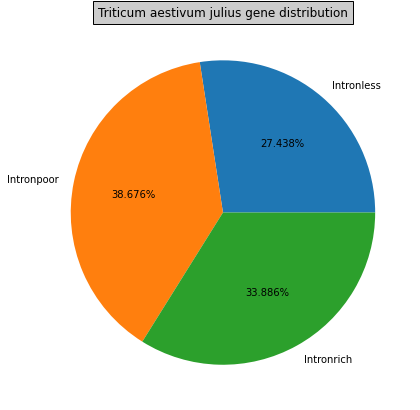

In [149]:
plotting_intron_types(38515, 54289, 47566, 'Triticum aestivum julius gene distribution')

In [150]:
### --- Creating the list of t_aestivum_julius gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_julius_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_julius_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_julius_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_julius)):
    if i == len(intronless_t_aestivum_julius) -1:
        intronless_file.write(intronless_t_aestivum_julius[i])
    else:
        intronless_file.write(intronless_t_aestivum_julius[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_julius)):
    if i == len(intronpoor_t_aestivum_julius) -1:
        intronpoor_file.write(intronpoor_t_aestivum_julius[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_julius[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_julius)):
    if i == len(intronrich_t_aestivum_julius) -1:
        intronrich_file.write(intronrich_t_aestivum_julius[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_julius[i]+'\n')
intronrich_file.close()


# Triticum aestivum lancer Ensembl 52

In [154]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [151]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_lancer = pd.read_csv('Data/Triticum_aestivum_lancer.PGSBv2.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_lancer[df_t_aestivum_lancer['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,11483.0,11786.0,.,+,.,ID=gene:TraesLAC1A03G00000060;biotype=protein_coding;gene_id=TraesLAC1A03G00000060;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,14488.0,14791.0,.,+,.,ID=gene:TraesLAC1A03G00000080;biotype=protein_coding;gene_id=TraesLAC1A03G00000080;logic_name=pgsb_genes_high_conf
40,1A,PGSB,gene,20981.0,21643.0,.,-,.,ID=gene:TraesLAC1A03G00000100;biotype=protein_coding;gene_id=TraesLAC1A03G00000100;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,22592.0,22897.0,.,+,.,ID=gene:TraesLAC1A03G00000110;biotype=protein_coding;gene_id=TraesLAC1A03G00000110;logic_name=pgsb_genes_high_conf
54,1A,PGSB,gene,39213.0,39518.0,.,+,.,ID=gene:TraesLAC1A03G00000160;biotype=protein_coding;gene_id=TraesLAC1A03G00000160;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2218368,7D,PGSB,gene,636266446.0,636282083.0,.,+,.,ID=gene:TraesLAC7D03G04444400;biotype=protein_coding;gene_id=TraesLAC7D03G04444400;logic_name=pgsb_genes_high_conf
2218387,7D,PGSB,gene,636327383.0,636328112.0,.,-,.,ID=gene:TraesLAC7D03G04444410;biotype=protein_coding;gene_id=TraesLAC7D03G04444410;logic_name=pgsb_genes_high_conf
2218396,7D,PGSB,gene,636388836.0,636392155.0,.,+,.,ID=gene:TraesLAC7D03G04444440;biotype=protein_coding;gene_id=TraesLAC7D03G04444440;logic_name=pgsb_genes_high_conf
2218419,7D,PGSB,gene,636442311.0,636443021.0,.,-,.,ID=gene:TraesLAC7D03G04444480;biotype=protein_coding;gene_id=TraesLAC7D03G04444480;logic_name=pgsb_genes_high_conf


In [158]:
df_t_aestivum_lancer[df_t_aestivum_lancer['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,11483.0,11786.0,.,+,.,ID=gene:TraesLAC1A03G00000060;biotype=protein_coding;gene_id=TraesLAC1A03G00000060;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,14488.0,14791.0,.,+,.,ID=gene:TraesLAC1A03G00000080;biotype=protein_coding;gene_id=TraesLAC1A03G00000080;logic_name=pgsb_genes_high_conf
40,1A,PGSB,gene,20981.0,21643.0,.,-,.,ID=gene:TraesLAC1A03G00000100;biotype=protein_coding;gene_id=TraesLAC1A03G00000100;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,22592.0,22897.0,.,+,.,ID=gene:TraesLAC1A03G00000110;biotype=protein_coding;gene_id=TraesLAC1A03G00000110;logic_name=pgsb_genes_high_conf
54,1A,PGSB,gene,39213.0,39518.0,.,+,.,ID=gene:TraesLAC1A03G00000160;biotype=protein_coding;gene_id=TraesLAC1A03G00000160;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2218368,7D,PGSB,gene,636266446.0,636282083.0,.,+,.,ID=gene:TraesLAC7D03G04444400;biotype=protein_coding;gene_id=TraesLAC7D03G04444400;logic_name=pgsb_genes_high_conf
2218387,7D,PGSB,gene,636327383.0,636328112.0,.,-,.,ID=gene:TraesLAC7D03G04444410;biotype=protein_coding;gene_id=TraesLAC7D03G04444410;logic_name=pgsb_genes_high_conf
2218396,7D,PGSB,gene,636388836.0,636392155.0,.,+,.,ID=gene:TraesLAC7D03G04444440;biotype=protein_coding;gene_id=TraesLAC7D03G04444440;logic_name=pgsb_genes_high_conf
2218419,7D,PGSB,gene,636442311.0,636443021.0,.,-,.,ID=gene:TraesLAC7D03G04444480;biotype=protein_coding;gene_id=TraesLAC7D03G04444480;logic_name=pgsb_genes_high_conf


All high conf

In [152]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_lancer = df_t_aestivum_lancer.loc[df_t_aestivum_lancer['type'].isin(['exon'])]
exon_t_aestivum_lancer.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
31,1A,PGSB,exon,11483.0,11786.0,.,+,.,Parent=transcript:TraesLAC1A03G00000060.1;Name=TraesLAC1A03G00000060.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC1A03G00000060.1-E1;rank=1
37,1A,PGSB,exon,14488.0,14791.0,.,+,.,Parent=transcript:TraesLAC1A03G00000080.1;Name=TraesLAC1A03G00000080.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC1A03G00000080.1-E1;rank=1
42,1A,PGSB,exon,20981.0,21121.0,.,-,.,Parent=transcript:TraesLAC1A03G00000100.1;Name=TraesLAC1A03G00000100.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesLAC1A03G00000100.1-E2;rank=2
45,1A,PGSB,exon,21239.0,21643.0,.,-,.,Parent=transcript:TraesLAC1A03G00000100.1;Name=TraesLAC1A03G00000100.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC1A03G00000100.1-E1;rank=1
51,1A,PGSB,exon,22592.0,22897.0,.,+,.,Parent=transcript:TraesLAC1A03G00000110.1;Name=TraesLAC1A03G00000110.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC1A03G00000110.1-E1;rank=1
57,1A,PGSB,exon,39213.0,39518.0,.,+,.,Parent=transcript:TraesLAC1A03G00000160.1;Name=TraesLAC1A03G00000160.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC1A03G00000160.1-E1;rank=1
63,1A,PGSB,exon,45878.0,46315.0,.,-,.,Parent=transcript:TraesLAC1A03G00000180.1;Name=TraesLAC1A03G00000180.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC1A03G00000180.1-E1;rank=1
69,1A,PGSB,exon,55965.0,56270.0,.,+,.,Parent=transcript:TraesLAC1A03G00000230.1;Name=TraesLAC1A03G00000230.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC1A03G00000230.1-E1;rank=1
75,1A,PGSB,exon,97981.0,98286.0,.,+,.,Parent=transcript:TraesLAC1A03G00000260.1;Name=TraesLAC1A03G00000260.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC1A03G00000260.1-E1;rank=1
81,1A,PGSB,exon,130155.0,130592.0,.,-,.,Parent=transcript:TraesLAC1A03G00000310.1;Name=TraesLAC1A03G00000310.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC1A03G00000310.1-E1;rank=1


In [153]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_lancer.to_csv('Data/Triticum_aestivum_lancer.PGSBv2.1.52.chr_EXON',sep='\t',index=False,header=False)

In [159]:
### --- Counting introns type
introns_dictionary_t_aestivum_lancer = counting_introns_type(exon_t_aestivum_lancer)

In [160]:
n_intronless_t_aestivum_lancer, n_intronpoor_t_aestivum_lancer, n_intronrich_t_aestivum_lancer, intronless_t_aestivum_lancer, intronpoor_t_aestivum_lancer, intronrich_t_aestivum_lancer = splitting_introns_type(introns_dictionary_t_aestivum_lancer)

Intronless are: 39102
Intronpoor are: 54453
Intronrich are: 45230


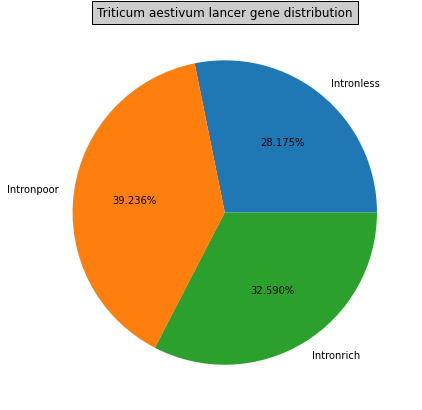

In [161]:
plotting_intron_types(39102, 54453, 45230, 'Triticum aestivum lancer gene distribution')

In [162]:
### --- Creating the list of t_aestivum_lancer gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_chr_lancer_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_chr_lancer_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_chr_lancer_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_lancer)):
    if i == len(intronless_t_aestivum_lancer) -1:
        intronless_file.write(intronless_t_aestivum_lancer[i])
    else:
        intronless_file.write(intronless_t_aestivum_lancer[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_lancer)):
    if i == len(intronpoor_t_aestivum_lancer) -1:
        intronpoor_file.write(intronpoor_t_aestivum_lancer[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_lancer[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_lancer)):
    if i == len(intronrich_t_aestivum_lancer) -1:
        intronrich_file.write(intronrich_t_aestivum_lancer[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_lancer[i]+'\n')
intronrich_file.close()


# Triticum aestivum landmark Ensembl 52

In [167]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [163]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_landmark = pd.read_csv('Data/Triticum_aestivum_landmark.PGSBv2.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_landmark[df_t_aestivum_landmark['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,11795.0,12098.0,.,+,.,ID=gene:TraesLDM1A03G00000070;biotype=protein_coding;gene_id=TraesLDM1A03G00000070;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,21200.0,21862.0,.,-,.,ID=gene:TraesLDM1A03G00000090;biotype=protein_coding;gene_id=TraesLDM1A03G00000090;logic_name=pgsb_genes_high_conf
42,1A,PGSB,gene,22811.0,23116.0,.,+,.,ID=gene:TraesLDM1A03G00000110;biotype=protein_coding;gene_id=TraesLDM1A03G00000110;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,40142.0,40447.0,.,+,.,ID=gene:TraesLDM1A03G00000150;biotype=protein_coding;gene_id=TraesLDM1A03G00000150;logic_name=pgsb_genes_high_conf
54,1A,PGSB,gene,47591.0,48028.0,.,-,.,ID=gene:TraesLDM1A03G00000170;biotype=protein_coding;gene_id=TraesLDM1A03G00000170;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2306325,7D,PGSB,gene,642059234.0,642060897.0,.,-,.,ID=gene:TraesLDM7D03G04502700;biotype=protein_coding;gene_id=TraesLDM7D03G04502700;logic_name=pgsb_genes_high_conf
2306336,7D,PGSB,gene,642079937.0,642081904.0,.,-,.,ID=gene:TraesLDM7D03G04502710;biotype=protein_coding;gene_id=TraesLDM7D03G04502710;logic_name=pgsb_genes_high_conf
2306345,7D,PGSB,gene,642149320.0,642150593.0,.,+,.,ID=gene:TraesLDM7D03G04502770;biotype=protein_coding;gene_id=TraesLDM7D03G04502770;logic_name=pgsb_genes_high_conf
2306352,7D,PGSB,gene,642285349.0,642289525.0,.,-,.,ID=gene:TraesLDM7D03G04502850;biotype=protein_coding;gene_id=TraesLDM7D03G04502850;logic_name=pgsb_genes_high_conf


In [166]:
df_t_aestivum_landmark[df_t_aestivum_landmark['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,11795.0,12098.0,.,+,.,ID=gene:TraesLDM1A03G00000070;biotype=protein_coding;gene_id=TraesLDM1A03G00000070;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,21200.0,21862.0,.,-,.,ID=gene:TraesLDM1A03G00000090;biotype=protein_coding;gene_id=TraesLDM1A03G00000090;logic_name=pgsb_genes_high_conf
42,1A,PGSB,gene,22811.0,23116.0,.,+,.,ID=gene:TraesLDM1A03G00000110;biotype=protein_coding;gene_id=TraesLDM1A03G00000110;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,40142.0,40447.0,.,+,.,ID=gene:TraesLDM1A03G00000150;biotype=protein_coding;gene_id=TraesLDM1A03G00000150;logic_name=pgsb_genes_high_conf
54,1A,PGSB,gene,47591.0,48028.0,.,-,.,ID=gene:TraesLDM1A03G00000170;biotype=protein_coding;gene_id=TraesLDM1A03G00000170;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2306325,7D,PGSB,gene,642059234.0,642060897.0,.,-,.,ID=gene:TraesLDM7D03G04502700;biotype=protein_coding;gene_id=TraesLDM7D03G04502700;logic_name=pgsb_genes_high_conf
2306336,7D,PGSB,gene,642079937.0,642081904.0,.,-,.,ID=gene:TraesLDM7D03G04502710;biotype=protein_coding;gene_id=TraesLDM7D03G04502710;logic_name=pgsb_genes_high_conf
2306345,7D,PGSB,gene,642149320.0,642150593.0,.,+,.,ID=gene:TraesLDM7D03G04502770;biotype=protein_coding;gene_id=TraesLDM7D03G04502770;logic_name=pgsb_genes_high_conf
2306352,7D,PGSB,gene,642285349.0,642289525.0,.,-,.,ID=gene:TraesLDM7D03G04502850;biotype=protein_coding;gene_id=TraesLDM7D03G04502850;logic_name=pgsb_genes_high_conf


All high conf

In [164]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_landmark = df_t_aestivum_landmark.loc[df_t_aestivum_landmark['type'].isin(['exon'])]
exon_t_aestivum_landmark.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
31,1A,PGSB,exon,11795.0,12098.0,.,+,.,Parent=transcript:TraesLDM1A03G00000070.1;Name=TraesLDM1A03G00000070.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLDM1A03G00000070.1-E1;rank=1
36,1A,PGSB,exon,21200.0,21340.0,.,-,.,Parent=transcript:TraesLDM1A03G00000090.1;Name=TraesLDM1A03G00000090.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesLDM1A03G00000090.1-E2;rank=2
39,1A,PGSB,exon,21458.0,21862.0,.,-,.,Parent=transcript:TraesLDM1A03G00000090.1;Name=TraesLDM1A03G00000090.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLDM1A03G00000090.1-E1;rank=1
45,1A,PGSB,exon,22811.0,23116.0,.,+,.,Parent=transcript:TraesLDM1A03G00000110.1;Name=TraesLDM1A03G00000110.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLDM1A03G00000110.1-E1;rank=1
51,1A,PGSB,exon,40142.0,40447.0,.,+,.,Parent=transcript:TraesLDM1A03G00000150.1;Name=TraesLDM1A03G00000150.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLDM1A03G00000150.1-E1;rank=1
57,1A,PGSB,exon,47591.0,48028.0,.,-,.,Parent=transcript:TraesLDM1A03G00000170.1;Name=TraesLDM1A03G00000170.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLDM1A03G00000170.1-E1;rank=1
63,1A,PGSB,exon,57853.0,58158.0,.,+,.,Parent=transcript:TraesLDM1A03G00000210.1;Name=TraesLDM1A03G00000210.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLDM1A03G00000210.1-E1;rank=1
69,1A,PGSB,exon,100771.0,101076.0,.,+,.,Parent=transcript:TraesLDM1A03G00000260.1;Name=TraesLDM1A03G00000260.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLDM1A03G00000260.1-E1;rank=1
75,1A,PGSB,exon,117762.0,118067.0,.,+,.,Parent=transcript:TraesLDM1A03G00000280.1;Name=TraesLDM1A03G00000280.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLDM1A03G00000280.1-E1;rank=1
81,1A,PGSB,exon,145616.0,146053.0,.,-,.,Parent=transcript:TraesLDM1A03G00000320.1;Name=TraesLDM1A03G00000320.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLDM1A03G00000320.1-E1;rank=1


In [165]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_landmark.to_csv('Data/Triticum_aestivum_landmark.PGSBv2.1.52.chr_EXON',sep='\t',index=False,header=False)

In [168]:
### --- Counting introns type
introns_dictionary_t_aestivum_landmark = counting_introns_type(exon_t_aestivum_landmark)

In [169]:
n_intronless_t_aestivum_landmark, n_intronpoor_t_aestivum_landmark, n_intronrich_t_aestivum_landmark, intronless_t_aestivum_landmark, intronpoor_t_aestivum_landmark, intronrich_t_aestivum_landmark = splitting_introns_type(introns_dictionary_t_aestivum_landmark)

Intronless are: 38879
Intronpoor are: 54185
Intronrich are: 46399


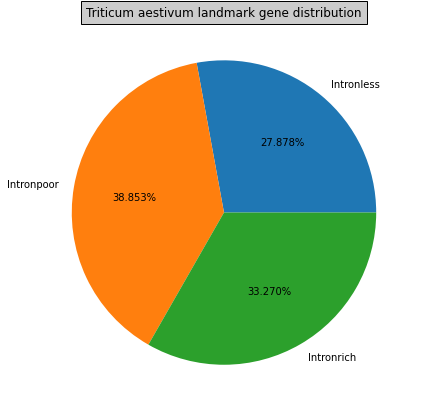

In [170]:
plotting_intron_types(38879, 54185, 46399, 'Triticum aestivum landmark gene distribution')

In [171]:
### --- Creating the list of t_aestivum_landmark gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_landmark_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_landmark_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_landmark_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_landmark)):
    if i == len(intronless_t_aestivum_landmark) -1:
        intronless_file.write(intronless_t_aestivum_landmark[i])
    else:
        intronless_file.write(intronless_t_aestivum_landmark[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_landmark)):
    if i == len(intronpoor_t_aestivum_landmark) -1:
        intronpoor_file.write(intronpoor_t_aestivum_landmark[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_landmark[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_landmark)):
    if i == len(intronrich_t_aestivum_landmark) -1:
        intronrich_file.write(intronrich_t_aestivum_landmark[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_landmark[i]+'\n')
intronrich_file.close()


# Triticum aestivum mace Ensembl 52

In [175]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [172]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_mace = pd.read_csv('Data/Triticum_aestivum_mace.PGSBv2.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_mace[df_t_aestivum_mace['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,9602.0,11711.0,.,+,.,ID=gene:TraesMAC1A03G00000010;biotype=protein_coding;gene_id=TraesMAC1A03G00000010;logic_name=pgsb_genes_high_conf
35,1A,PGSB,gene,27896.0,29477.0,.,+,.,ID=gene:TraesMAC1A03G00000020;biotype=protein_coding;gene_id=TraesMAC1A03G00000020;logic_name=pgsb_genes_high_conf
44,1A,PGSB,gene,170676.0,171725.0,.,-,.,ID=gene:TraesMAC1A03G00000210;biotype=protein_coding;gene_id=TraesMAC1A03G00000210;logic_name=pgsb_genes_high_conf
53,1A,PGSB,gene,234275.0,245610.0,.,+,.,ID=gene:TraesMAC1A03G00000240;biotype=protein_coding;gene_id=TraesMAC1A03G00000240;logic_name=pgsb_genes_high_conf
102,1A,PGSB,gene,343474.0,349417.0,.,+,.,ID=gene:TraesMAC1A03G00000300;biotype=protein_coding;gene_id=TraesMAC1A03G00000300;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2224480,7D,PGSB,gene,636399988.0,636414856.0,.,-,.,ID=gene:TraesMAC7D03G04489020;biotype=protein_coding;gene_id=TraesMAC7D03G04489020;logic_name=pgsb_genes_high_conf
2224516,7D,PGSB,gene,636566671.0,636573523.0,.,-,.,ID=gene:TraesMAC7D03G04489040;biotype=protein_coding;gene_id=TraesMAC7D03G04489040;logic_name=pgsb_genes_high_conf
2224565,7D,PGSB,gene,636580445.0,636580804.0,.,-,.,ID=gene:TraesMAC7D03G04489050;biotype=protein_coding;gene_id=TraesMAC7D03G04489050;logic_name=pgsb_genes_high_conf
2224570,7D,PGSB,gene,636602014.0,636602555.0,.,-,.,ID=gene:TraesMAC7D03G04489060;biotype=protein_coding;gene_id=TraesMAC7D03G04489060;logic_name=pgsb_genes_high_conf


In [186]:
df_t_aestivum_mace[df_t_aestivum_mace['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,9602.0,11711.0,.,+,.,ID=gene:TraesMAC1A03G00000010;biotype=protein_coding;gene_id=TraesMAC1A03G00000010;logic_name=pgsb_genes_high_conf
35,1A,PGSB,gene,27896.0,29477.0,.,+,.,ID=gene:TraesMAC1A03G00000020;biotype=protein_coding;gene_id=TraesMAC1A03G00000020;logic_name=pgsb_genes_high_conf
44,1A,PGSB,gene,170676.0,171725.0,.,-,.,ID=gene:TraesMAC1A03G00000210;biotype=protein_coding;gene_id=TraesMAC1A03G00000210;logic_name=pgsb_genes_high_conf
53,1A,PGSB,gene,234275.0,245610.0,.,+,.,ID=gene:TraesMAC1A03G00000240;biotype=protein_coding;gene_id=TraesMAC1A03G00000240;logic_name=pgsb_genes_high_conf
102,1A,PGSB,gene,343474.0,349417.0,.,+,.,ID=gene:TraesMAC1A03G00000300;biotype=protein_coding;gene_id=TraesMAC1A03G00000300;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2224480,7D,PGSB,gene,636399988.0,636414856.0,.,-,.,ID=gene:TraesMAC7D03G04489020;biotype=protein_coding;gene_id=TraesMAC7D03G04489020;logic_name=pgsb_genes_high_conf
2224516,7D,PGSB,gene,636566671.0,636573523.0,.,-,.,ID=gene:TraesMAC7D03G04489040;biotype=protein_coding;gene_id=TraesMAC7D03G04489040;logic_name=pgsb_genes_high_conf
2224565,7D,PGSB,gene,636580445.0,636580804.0,.,-,.,ID=gene:TraesMAC7D03G04489050;biotype=protein_coding;gene_id=TraesMAC7D03G04489050;logic_name=pgsb_genes_high_conf
2224570,7D,PGSB,gene,636602014.0,636602555.0,.,-,.,ID=gene:TraesMAC7D03G04489060;biotype=protein_coding;gene_id=TraesMAC7D03G04489060;logic_name=pgsb_genes_high_conf


All high conf

In [173]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_mace = df_t_aestivum_mace.loc[df_t_aestivum_mace['type'].isin(['exon'])]
exon_t_aestivum_mace.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
31,1A,PGSB,exon,9602.0,11711.0,.,+,.,Parent=transcript:TraesMAC1A03G00000010.1;Name=TraesMAC1A03G00000010.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesMAC1A03G00000010.1-E1;rank=1
38,1A,PGSB,exon,27896.0,28458.0,.,+,.,Parent=transcript:TraesMAC1A03G00000020.1;Name=TraesMAC1A03G00000020.1-E1;constitutive=1;ensembl_end_phase=2;ensembl_phase=-1;exon_id=TraesMAC1A03G00000020.1-E1;rank=1
41,1A,PGSB,exon,28925.0,29477.0,.,+,.,Parent=transcript:TraesMAC1A03G00000020.1;Name=TraesMAC1A03G00000020.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=2;exon_id=TraesMAC1A03G00000020.1-E2;rank=2
47,1A,PGSB,exon,170676.0,170742.0,.,-,.,Parent=transcript:TraesMAC1A03G00000210.1;Name=TraesMAC1A03G00000210.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=TraesMAC1A03G00000210.1-E2;rank=2
50,1A,PGSB,exon,170891.0,171725.0,.,-,.,Parent=transcript:TraesMAC1A03G00000210.1;Name=TraesMAC1A03G00000210.1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesMAC1A03G00000210.1-E1;rank=1
55,1A,PGSB,exon,234275.0,234535.0,.,+,.,Parent=transcript:TraesMAC1A03G00000240.1;Name=TraesMAC1A03G00000240.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesMAC1A03G00000240.1-E1;rank=1
58,1A,PGSB,exon,234609.0,234781.0,.,+,.,Parent=transcript:TraesMAC1A03G00000240.1;Name=TraesMAC1A03G00000240.1-E2;constitutive=1;ensembl_end_phase=2;ensembl_phase=-1;exon_id=TraesMAC1A03G00000240.1-E2;rank=2
60,1A,PGSB,exon,234926.0,235211.0,.,+,.,Parent=transcript:TraesMAC1A03G00000240.1;Name=TraesMAC1A03G00000240.1-E3;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesMAC1A03G00000240.1-E3;rank=3
62,1A,PGSB,exon,235328.0,235495.0,.,+,.,Parent=transcript:TraesMAC1A03G00000240.1;Name=TraesMAC1A03G00000240.1-E4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesMAC1A03G00000240.1-E4;rank=4
64,1A,PGSB,exon,235885.0,236161.0,.,+,.,Parent=transcript:TraesMAC1A03G00000240.1;Name=TraesMAC1A03G00000240.1-E5;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesMAC1A03G00000240.1-E5;rank=5


In [174]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_mace.to_csv('Data/Triticum_aestivum_mace.PGSBv2.1.52.chr_EXON',sep='\t',index=False,header=False)

In [176]:
### --- Counting introns type
introns_dictionary_t_aestivum_mace = counting_introns_type(exon_t_aestivum_mace)

In [177]:
n_intronless_t_aestivum_mace, n_intronpoor_t_aestivum_mace, n_intronrich_t_aestivum_mace, intronless_t_aestivum_mace, intronpoor_t_aestivum_mace, intronrich_t_aestivum_mace = splitting_introns_type(introns_dictionary_t_aestivum_mace)

Intronless are: 38997
Intronpoor are: 54655
Intronrich are: 45468


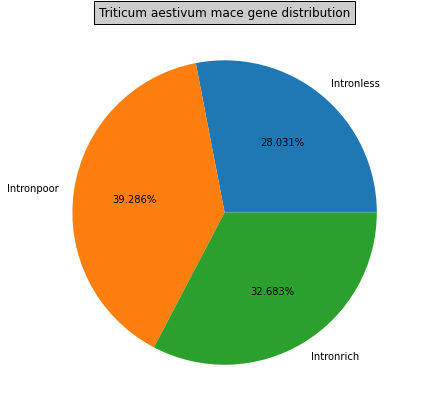

In [178]:
plotting_intron_types(38997, 54655, 45468, 'Triticum aestivum mace gene distribution')

In [179]:
### --- Creating the list of t_aestivum_mace gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_mace_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_mace_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_mace_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_mace)):
    if i == len(intronless_t_aestivum_mace) -1:
        intronless_file.write(intronless_t_aestivum_mace[i])
    else:
        intronless_file.write(intronless_t_aestivum_mace[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_mace)):
    if i == len(intronpoor_t_aestivum_mace) -1:
        intronpoor_file.write(intronpoor_t_aestivum_mace[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_mace[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_mace)):
    if i == len(intronrich_t_aestivum_mace) -1:
        intronrich_file.write(intronrich_t_aestivum_mace[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_mace[i]+'\n')
intronrich_file.close()


# Triticum aestivum mattis Ensembl 52

In [183]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [180]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_mattis = pd.read_csv('Data/Triticum_aestivum_mattis.PGSBv2.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_mattis[df_t_aestivum_mattis['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,1112215.0,1113562.0,.,+,.,ID=gene:TraesSYM1A03G00000240;biotype=protein_coding;gene_id=TraesSYM1A03G00000240;logic_name=pgsb_genes_high_conf
37,1A,PGSB,gene,1114236.0,1116560.0,.,+,.,ID=gene:TraesSYM1A03G00000250;biotype=protein_coding;gene_id=TraesSYM1A03G00000250;logic_name=pgsb_genes_high_conf
44,1A,PGSB,gene,1125466.0,1127385.0,.,+,.,ID=gene:TraesSYM1A03G00000260;biotype=protein_coding;gene_id=TraesSYM1A03G00000260;logic_name=pgsb_genes_high_conf
51,1A,PGSB,gene,1127845.0,1131178.0,.,-,.,ID=gene:TraesSYM1A03G00000270;biotype=protein_coding;gene_id=TraesSYM1A03G00000270;logic_name=pgsb_genes_high_conf
168,1A,PGSB,gene,1131917.0,1136155.0,.,-,.,ID=gene:TraesSYM1A03G00000280;biotype=protein_coding;gene_id=TraesSYM1A03G00000280;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2279264,7D,PGSB,gene,634734779.0,634737368.0,.,+,.,ID=gene:TraesSYM7D03G04551240;biotype=protein_coding;gene_id=TraesSYM7D03G04551240;logic_name=pgsb_genes_high_conf
2279273,7D,PGSB,gene,634758050.0,634760354.0,.,-,.,ID=gene:TraesSYM7D03G04551260;biotype=protein_coding;gene_id=TraesSYM7D03G04551260;logic_name=pgsb_genes_high_conf
2279282,7D,PGSB,gene,634837100.0,634837890.0,.,-,.,ID=gene:TraesSYM7D03G04551300;biotype=protein_coding;gene_id=TraesSYM7D03G04551300;logic_name=pgsb_genes_high_conf
2279289,7D,PGSB,gene,634900708.0,634903726.0,.,+,.,ID=gene:TraesSYM7D03G04551330;biotype=protein_coding;gene_id=TraesSYM7D03G04551330;logic_name=pgsb_genes_high_conf


In [187]:
df_t_aestivum_mattis[df_t_aestivum_mattis['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,1112215.0,1113562.0,.,+,.,ID=gene:TraesSYM1A03G00000240;biotype=protein_coding;gene_id=TraesSYM1A03G00000240;logic_name=pgsb_genes_high_conf
37,1A,PGSB,gene,1114236.0,1116560.0,.,+,.,ID=gene:TraesSYM1A03G00000250;biotype=protein_coding;gene_id=TraesSYM1A03G00000250;logic_name=pgsb_genes_high_conf
44,1A,PGSB,gene,1125466.0,1127385.0,.,+,.,ID=gene:TraesSYM1A03G00000260;biotype=protein_coding;gene_id=TraesSYM1A03G00000260;logic_name=pgsb_genes_high_conf
51,1A,PGSB,gene,1127845.0,1131178.0,.,-,.,ID=gene:TraesSYM1A03G00000270;biotype=protein_coding;gene_id=TraesSYM1A03G00000270;logic_name=pgsb_genes_high_conf
168,1A,PGSB,gene,1131917.0,1136155.0,.,-,.,ID=gene:TraesSYM1A03G00000280;biotype=protein_coding;gene_id=TraesSYM1A03G00000280;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2279264,7D,PGSB,gene,634734779.0,634737368.0,.,+,.,ID=gene:TraesSYM7D03G04551240;biotype=protein_coding;gene_id=TraesSYM7D03G04551240;logic_name=pgsb_genes_high_conf
2279273,7D,PGSB,gene,634758050.0,634760354.0,.,-,.,ID=gene:TraesSYM7D03G04551260;biotype=protein_coding;gene_id=TraesSYM7D03G04551260;logic_name=pgsb_genes_high_conf
2279282,7D,PGSB,gene,634837100.0,634837890.0,.,-,.,ID=gene:TraesSYM7D03G04551300;biotype=protein_coding;gene_id=TraesSYM7D03G04551300;logic_name=pgsb_genes_high_conf
2279289,7D,PGSB,gene,634900708.0,634903726.0,.,+,.,ID=gene:TraesSYM7D03G04551330;biotype=protein_coding;gene_id=TraesSYM7D03G04551330;logic_name=pgsb_genes_high_conf


All high conf

In [181]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_mattis = df_t_aestivum_mattis.loc[df_t_aestivum_mattis['type'].isin(['exon'])]
exon_t_aestivum_mattis.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
31,1A,PGSB,exon,1112215.0,1112477.0,.,+,.,Parent=transcript:TraesSYM1A03G00000240.1;Name=TraesSYM1A03G00000240.1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesSYM1A03G00000240.1-E1;rank=1
34,1A,PGSB,exon,1112958.0,1113562.0,.,+,.,Parent=transcript:TraesSYM1A03G00000240.1;Name=TraesSYM1A03G00000240.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=TraesSYM1A03G00000240.1-E2;rank=2
40,1A,PGSB,exon,1114236.0,1116560.0,.,+,.,Parent=transcript:TraesSYM1A03G00000250.1;Name=TraesSYM1A03G00000250.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSYM1A03G00000250.1-E1;rank=1
47,1A,PGSB,exon,1125466.0,1127385.0,.,+,.,Parent=transcript:TraesSYM1A03G00000260.1;Name=TraesSYM1A03G00000260.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSYM1A03G00000260.1-E1;rank=1
54,1A,PGSB,exon,1127845.0,1128626.0,.,-,.,Parent=transcript:TraesSYM1A03G00000270.4;Name=TraesSYM1A03G00000270.4-E10;constitutive=0;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesSYM1A03G00000270.4-E10;rank=10
56,1A,PGSB,exon,1128731.0,1128772.0,.,-,.,Parent=transcript:TraesSYM1A03G00000270.4;Name=TraesSYM1A03G00000270.4-E9;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesSYM1A03G00000270.4-E9;rank=9
58,1A,PGSB,exon,1129037.0,1129104.0,.,-,.,Parent=transcript:TraesSYM1A03G00000270.4;Name=TraesSYM1A03G00000270.4-E8;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesSYM1A03G00000270.4-E8;rank=8
60,1A,PGSB,exon,1129183.0,1129225.0,.,-,.,Parent=transcript:TraesSYM1A03G00000270.4;Name=TraesSYM1A03G00000270.4-E7;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesSYM1A03G00000270.4-E7;rank=7
62,1A,PGSB,exon,1129327.0,1129358.0,.,-,.,Parent=transcript:TraesSYM1A03G00000270.4;Name=TraesSYM1A03G00000270.4-E6;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesSYM1A03G00000270.4-E6;rank=6
64,1A,PGSB,exon,1129738.0,1129908.0,.,-,.,Parent=transcript:TraesSYM1A03G00000270.4;Name=TraesSYM1A03G00000270.4-E5;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesSYM1A03G00000270.4-E5;rank=5


In [182]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_mattis.to_csv('Data/Triticum_aestivum_mattis.PGSBv2.1.52.chr_EXON',sep='\t',index=False,header=False)

In [184]:
### --- Counting introns type
introns_dictionary_t_aestivum_mattis = counting_introns_type(exon_t_aestivum_mattis)

In [185]:
n_intronless_t_aestivum_mattis, n_intronpoor_t_aestivum_mattis, n_intronrich_t_aestivum_mattis, intronless_t_aestivum_mattis, intronpoor_t_aestivum_mattis, intronrich_t_aestivum_mattis = splitting_introns_type(introns_dictionary_t_aestivum_mattis)

Intronless are: 39443
Intronpoor are: 55022
Intronrich are: 46164


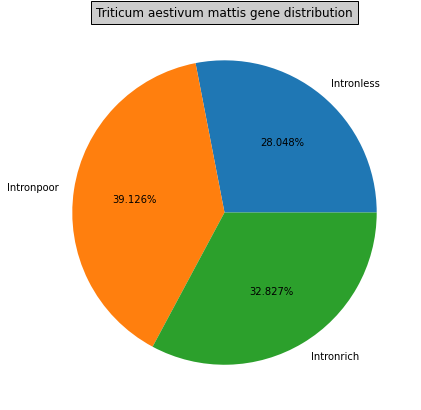

In [189]:
plotting_intron_types(39443, 55022, 46164, 'Triticum aestivum mattis gene distribution')

In [190]:
### --- Creating the list of t_aestivum_mattis gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_mattis_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_mattis_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_mattis_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_mattis)):
    if i == len(intronless_t_aestivum_mattis) -1:
        intronless_file.write(intronless_t_aestivum_mattis[i])
    else:
        intronless_file.write(intronless_t_aestivum_mattis[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_mattis)):
    if i == len(intronpoor_t_aestivum_mattis) -1:
        intronpoor_file.write(intronpoor_t_aestivum_mattis[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_mattis[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_mattis)):
    if i == len(intronrich_t_aestivum_mattis) -1:
        intronrich_file.write(intronrich_t_aestivum_mattis[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_mattis[i]+'\n')
intronrich_file.close()


# Triticum aestivum norin Ensembl 52

In [195]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [191]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_norin = pd.read_csv('Data/Triticum_aestivum_norin61.PGSBv2.1.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_norin[df_t_aestivum_norin['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,55.0,495.0,.,-,.,ID=gene:TraesNOR1A03G00000010;biotype=protein_coding;gene_id=TraesNOR1A03G00000010;logic_name=pgsb_genes_high_conf
35,1A,PGSB,gene,2239.0,4441.0,.,+,.,ID=gene:TraesNOR1A03G00000030;biotype=protein_coding;gene_id=TraesNOR1A03G00000030;logic_name=pgsb_genes_high_conf
42,1A,PGSB,gene,5491.0,7005.0,.,-,.,ID=gene:TraesNOR1A03G00000040;biotype=protein_coding;gene_id=TraesNOR1A03G00000040;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,7097.0,7360.0,.,-,.,ID=gene:TraesNOR1A03G00000050;biotype=protein_coding;gene_id=TraesNOR1A03G00000050;logic_name=pgsb_genes_high_conf
53,1A,PGSB,gene,8916.0,9161.0,.,-,.,ID=gene:TraesNOR1A03G00000060;biotype=protein_coding;gene_id=TraesNOR1A03G00000060;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2330252,7D,PGSB,gene,633065560.0,633066645.0,.,-,.,ID=gene:TraesNOR7D03G04544980;biotype=protein_coding;gene_id=TraesNOR7D03G04544980;logic_name=pgsb_genes_high_conf
2330261,7D,PGSB,gene,633127056.0,633130371.0,.,+,.,ID=gene:TraesNOR7D03G04545010;biotype=protein_coding;gene_id=TraesNOR7D03G04545010;logic_name=pgsb_genes_high_conf
2330286,7D,PGSB,gene,633180873.0,633181607.0,.,-,.,ID=gene:TraesNOR7D03G04545040;biotype=protein_coding;gene_id=TraesNOR7D03G04545040;logic_name=pgsb_genes_high_conf
2330293,7D,PGSB,gene,633487036.0,633488585.0,.,-,.,ID=gene:TraesNOR7D03G04545210;biotype=protein_coding;gene_id=TraesNOR7D03G04545210;logic_name=pgsb_genes_high_conf


In [194]:
df_t_aestivum_norin[df_t_aestivum_norin['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,55.0,495.0,.,-,.,ID=gene:TraesNOR1A03G00000010;biotype=protein_coding;gene_id=TraesNOR1A03G00000010;logic_name=pgsb_genes_high_conf
35,1A,PGSB,gene,2239.0,4441.0,.,+,.,ID=gene:TraesNOR1A03G00000030;biotype=protein_coding;gene_id=TraesNOR1A03G00000030;logic_name=pgsb_genes_high_conf
42,1A,PGSB,gene,5491.0,7005.0,.,-,.,ID=gene:TraesNOR1A03G00000040;biotype=protein_coding;gene_id=TraesNOR1A03G00000040;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,7097.0,7360.0,.,-,.,ID=gene:TraesNOR1A03G00000050;biotype=protein_coding;gene_id=TraesNOR1A03G00000050;logic_name=pgsb_genes_high_conf
53,1A,PGSB,gene,8916.0,9161.0,.,-,.,ID=gene:TraesNOR1A03G00000060;biotype=protein_coding;gene_id=TraesNOR1A03G00000060;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2330252,7D,PGSB,gene,633065560.0,633066645.0,.,-,.,ID=gene:TraesNOR7D03G04544980;biotype=protein_coding;gene_id=TraesNOR7D03G04544980;logic_name=pgsb_genes_high_conf
2330261,7D,PGSB,gene,633127056.0,633130371.0,.,+,.,ID=gene:TraesNOR7D03G04545010;biotype=protein_coding;gene_id=TraesNOR7D03G04545010;logic_name=pgsb_genes_high_conf
2330286,7D,PGSB,gene,633180873.0,633181607.0,.,-,.,ID=gene:TraesNOR7D03G04545040;biotype=protein_coding;gene_id=TraesNOR7D03G04545040;logic_name=pgsb_genes_high_conf
2330293,7D,PGSB,gene,633487036.0,633488585.0,.,-,.,ID=gene:TraesNOR7D03G04545210;biotype=protein_coding;gene_id=TraesNOR7D03G04545210;logic_name=pgsb_genes_high_conf


All high conf

In [192]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_norin = df_t_aestivum_norin.loc[df_t_aestivum_norin['type'].isin(['exon'])]
exon_t_aestivum_norin.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
31,1A,PGSB,exon,55.0,495.0,.,-,.,Parent=transcript:TraesNOR1A03G00000010.1;Name=TraesNOR1A03G00000010.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesNOR1A03G00000010.1-E1;rank=1
38,1A,PGSB,exon,2239.0,4441.0,.,+,.,Parent=transcript:TraesNOR1A03G00000030.1;Name=TraesNOR1A03G00000030.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesNOR1A03G00000030.1-E1;rank=1
45,1A,PGSB,exon,5491.0,7005.0,.,-,.,Parent=transcript:TraesNOR1A03G00000040.1;Name=TraesNOR1A03G00000040.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesNOR1A03G00000040.1-E1;rank=1
50,1A,PGSB,exon,7097.0,7360.0,.,-,.,Parent=transcript:TraesNOR1A03G00000050.1;Name=TraesNOR1A03G00000050.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesNOR1A03G00000050.1-E1;rank=1
55,1A,PGSB,exon,8916.0,9161.0,.,-,.,Parent=transcript:TraesNOR1A03G00000060.1;Name=TraesNOR1A03G00000060.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesNOR1A03G00000060.1-E1;rank=1
61,1A,PGSB,exon,9810.0,10520.0,.,-,.,Parent=transcript:TraesNOR1A03G00000070.1;Name=TraesNOR1A03G00000070.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesNOR1A03G00000070.1-E1;rank=1
67,1A,PGSB,exon,23175.0,24304.0,.,+,.,Parent=transcript:TraesNOR1A03G00000120.1;Name=TraesNOR1A03G00000120.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesNOR1A03G00000120.1-E1;rank=1
74,1A,PGSB,exon,140756.0,142130.0,.,+,.,Parent=transcript:TraesNOR1A03G00000180.1;Name=TraesNOR1A03G00000180.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesNOR1A03G00000180.1-E1;rank=1
81,1A,PGSB,exon,147346.0,148543.0,.,-,.,Parent=transcript:TraesNOR1A03G00000190.1;Name=TraesNOR1A03G00000190.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=TraesNOR1A03G00000190.1-E2;rank=2
84,1A,PGSB,exon,148695.0,148965.0,.,-,.,Parent=transcript:TraesNOR1A03G00000190.1;Name=TraesNOR1A03G00000190.1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesNOR1A03G00000190.1-E1;rank=1


In [193]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_norin.to_csv('Data/Triticum_aestivum_norin61.PGSBv2.1.52.chr_EXON',sep='\t',index=False,header=False)

In [196]:
### --- Counting introns type
introns_dictionary_t_aestivum_norin = counting_introns_type(exon_t_aestivum_norin)

In [197]:
n_intronless_t_aestivum_norin, n_intronpoor_t_aestivum_norin, n_intronrich_t_aestivum_norin, intronless_t_aestivum_norin, intronpoor_t_aestivum_norin, intronrich_t_aestivum_norin = splitting_introns_type(introns_dictionary_t_aestivum_norin)

Intronless are: 39563
Intronpoor are: 55094
Intronrich are: 46895


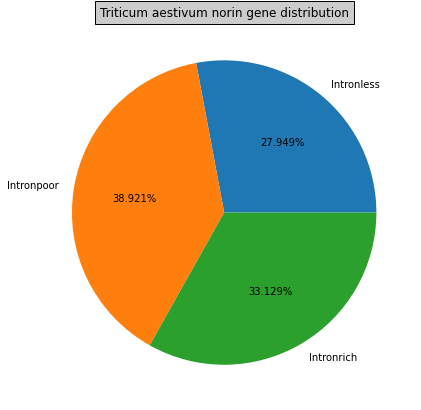

In [198]:
plotting_intron_types(39563, 55094, 46895, 'Triticum aestivum norin gene distribution')

In [199]:
### --- Creating the list of t_aestivum_norin gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_norin_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_norin_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_norin_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_norin)):
    if i == len(intronless_t_aestivum_norin) -1:
        intronless_file.write(intronless_t_aestivum_norin[i])
    else:
        intronless_file.write(intronless_t_aestivum_norin[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_norin)):
    if i == len(intronpoor_t_aestivum_norin) -1:
        intronpoor_file.write(intronpoor_t_aestivum_norin[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_norin[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_norin)):
    if i == len(intronrich_t_aestivum_norin) -1:
        intronrich_file.write(intronrich_t_aestivum_norin[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_norin[i]+'\n')
intronrich_file.close()


# Triticum aestivum stanley Ensembl 52

In [203]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [200]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_stanley = pd.read_csv('Data/Triticum_aestivum_stanley.PGSBv2.2.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_stanley[df_t_aestivum_stanley['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,8172.0,8444.0,.,-,.,ID=gene:TraesSTA1A03G00000030;biotype=protein_coding;gene_id=TraesSTA1A03G00000030;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,13293.0,14511.0,.,-,.,ID=gene:TraesSTA1A03G00000050;biotype=protein_coding;gene_id=TraesSTA1A03G00000050;logic_name=pgsb_genes_high_conf
41,1A,PGSB,gene,15488.0,15925.0,.,-,.,ID=gene:TraesSTA1A03G00000060;biotype=protein_coding;gene_id=TraesSTA1A03G00000060;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,17672.0,19874.0,.,+,.,ID=gene:TraesSTA1A03G00000080;biotype=protein_coding;gene_id=TraesSTA1A03G00000080;logic_name=pgsb_genes_high_conf
55,1A,PGSB,gene,20917.0,22438.0,.,-,.,ID=gene:TraesSTA1A03G00000090;biotype=protein_coding;gene_id=TraesSTA1A03G00000090;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2267588,7D,PGSB,gene,643705106.0,643705738.0,.,+,.,ID=gene:TraesSTA7D03G04490980;biotype=protein_coding;gene_id=TraesSTA7D03G04490980;logic_name=pgsb_genes_high_conf
2267595,7D,PGSB,gene,643705786.0,643706382.0,.,+,.,ID=gene:TraesSTA7D03G04490990;biotype=protein_coding;gene_id=TraesSTA7D03G04490990;logic_name=pgsb_genes_high_conf
2267602,7D,PGSB,gene,643707174.0,643710525.0,.,+,.,ID=gene:TraesSTA7D03G04491000;biotype=protein_coding;gene_id=TraesSTA7D03G04491000;logic_name=pgsb_genes_high_conf
2267609,7D,PGSB,gene,643709288.0,643709812.0,.,-,.,ID=gene:TraesSTA7D03G04491010;biotype=protein_coding;gene_id=TraesSTA7D03G04491010;logic_name=pgsb_genes_high_conf


In [204]:
df_t_aestivum_stanley[df_t_aestivum_stanley['attributes'].str.contains("high_conf", na=False)]

,chr,source,type,start,end,score,strand,phase,attributes
28,1A,PGSB,gene,8172.0,8444.0,.,-,.,ID=gene:TraesSTA1A03G00000030;biotype=protein_coding;gene_id=TraesSTA1A03G00000030;logic_name=pgsb_genes_high_conf
34,1A,PGSB,gene,13293.0,14511.0,.,-,.,ID=gene:TraesSTA1A03G00000050;biotype=protein_coding;gene_id=TraesSTA1A03G00000050;logic_name=pgsb_genes_high_conf
41,1A,PGSB,gene,15488.0,15925.0,.,-,.,ID=gene:TraesSTA1A03G00000060;biotype=protein_coding;gene_id=TraesSTA1A03G00000060;logic_name=pgsb_genes_high_conf
48,1A,PGSB,gene,17672.0,19874.0,.,+,.,ID=gene:TraesSTA1A03G00000080;biotype=protein_coding;gene_id=TraesSTA1A03G00000080;logic_name=pgsb_genes_high_conf
55,1A,PGSB,gene,20917.0,22438.0,.,-,.,ID=gene:TraesSTA1A03G00000090;biotype=protein_coding;gene_id=TraesSTA1A03G00000090;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2267588,7D,PGSB,gene,643705106.0,643705738.0,.,+,.,ID=gene:TraesSTA7D03G04490980;biotype=protein_coding;gene_id=TraesSTA7D03G04490980;logic_name=pgsb_genes_high_conf
2267595,7D,PGSB,gene,643705786.0,643706382.0,.,+,.,ID=gene:TraesSTA7D03G04490990;biotype=protein_coding;gene_id=TraesSTA7D03G04490990;logic_name=pgsb_genes_high_conf
2267602,7D,PGSB,gene,643707174.0,643710525.0,.,+,.,ID=gene:TraesSTA7D03G04491000;biotype=protein_coding;gene_id=TraesSTA7D03G04491000;logic_name=pgsb_genes_high_conf
2267609,7D,PGSB,gene,643709288.0,643709812.0,.,-,.,ID=gene:TraesSTA7D03G04491010;biotype=protein_coding;gene_id=TraesSTA7D03G04491010;logic_name=pgsb_genes_high_conf


All high conf

In [201]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_stanley = df_t_aestivum_stanley.loc[df_t_aestivum_stanley['type'].isin(['exon'])]
exon_t_aestivum_stanley.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
31,1A,PGSB,exon,8172.0,8444.0,.,-,.,Parent=transcript:TraesSTA1A03G00000030.1;Name=TraesSTA1A03G00000030.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesSTA1A03G00000030.1-E1;rank=1
37,1A,PGSB,exon,13293.0,14511.0,.,-,.,Parent=transcript:TraesSTA1A03G00000050.1;Name=TraesSTA1A03G00000050.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSTA1A03G00000050.1-E1;rank=1
44,1A,PGSB,exon,15488.0,15925.0,.,-,.,Parent=transcript:TraesSTA1A03G00000060.1;Name=TraesSTA1A03G00000060.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSTA1A03G00000060.1-E1;rank=1
51,1A,PGSB,exon,17672.0,19874.0,.,+,.,Parent=transcript:TraesSTA1A03G00000080.1;Name=TraesSTA1A03G00000080.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSTA1A03G00000080.1-E1;rank=1
58,1A,PGSB,exon,20917.0,22438.0,.,-,.,Parent=transcript:TraesSTA1A03G00000090.1;Name=TraesSTA1A03G00000090.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesSTA1A03G00000090.1-E1;rank=1
63,1A,PGSB,exon,22530.0,22793.0,.,-,.,Parent=transcript:TraesSTA1A03G00000100.1;Name=TraesSTA1A03G00000100.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesSTA1A03G00000100.1-E1;rank=1
68,1A,PGSB,exon,24348.0,24593.0,.,-,.,Parent=transcript:TraesSTA1A03G00000110.1;Name=TraesSTA1A03G00000110.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesSTA1A03G00000110.1-E1;rank=1
74,1A,PGSB,exon,25242.0,25952.0,.,-,.,Parent=transcript:TraesSTA1A03G00000120.1;Name=TraesSTA1A03G00000120.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesSTA1A03G00000120.1-E1;rank=1
80,1A,PGSB,exon,38631.0,39778.0,.,+,.,Parent=transcript:TraesSTA1A03G00000170.1;Name=TraesSTA1A03G00000170.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSTA1A03G00000170.1-E1;rank=1
87,1A,PGSB,exon,161436.0,162800.0,.,+,.,Parent=transcript:TraesSTA1A03G00000220.1;Name=TraesSTA1A03G00000220.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSTA1A03G00000220.1-E1;rank=1


In [202]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_stanley.to_csv('Data/Triticum_aestivum_stanley.PGSBv2.2.52.chr_EXON',sep='\t',index=False,header=False)

In [205]:
### --- Counting introns type
introns_dictionary_t_aestivum_stanley = counting_introns_type(exon_t_aestivum_stanley)

In [206]:
n_intronless_t_aestivum_stanley, n_intronpoor_t_aestivum_stanley, n_intronrich_t_aestivum_stanley, intronless_t_aestivum_stanley, intronpoor_t_aestivum_stanley, intronrich_t_aestivum_stanley = splitting_introns_type(introns_dictionary_t_aestivum_stanley)

Intronless are: 39004
Intronpoor are: 54457
Intronrich are: 45962


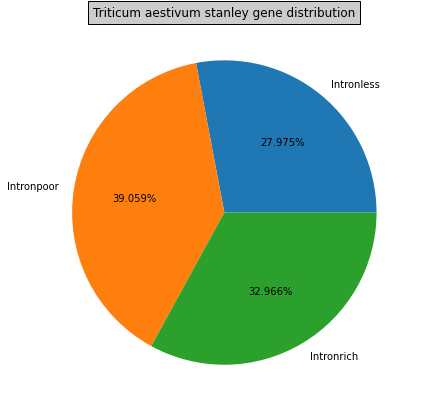

In [207]:
plotting_intron_types(39004, 54457, 45962, 'Triticum aestivum stanley gene distribution')

In [208]:
### --- Creating the list of t_aestivum_stanley gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_stanley_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_stanley_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_stanley_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_stanley)):
    if i == len(intronless_t_aestivum_stanley) -1:
        intronless_file.write(intronless_t_aestivum_stanley[i])
    else:
        intronless_file.write(intronless_t_aestivum_stanley[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_stanley)):
    if i == len(intronpoor_t_aestivum_stanley) -1:
        intronpoor_file.write(intronpoor_t_aestivum_stanley[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_stanley[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_stanley)):
    if i == len(intronrich_t_aestivum_stanley) -1:
        intronrich_file.write(intronrich_t_aestivum_stanley[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_stanley[i]+'\n')
intronrich_file.close()


# Zea mays Ensembl 52

In [211]:
### --- Function to count introns within a dataframe made of exons formatted like exon_z_mays
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('_')[0]] = counts.get(i.split('_')[0], 0) + 1
    return counts

In [209]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_z_mays = pd.read_csv('Data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.chr.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_z_mays[df_z_mays['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
18,1,ensembl,gene,34617.0,40204.0,.,+,.,ID=gene:Zm00001eb000010;biotype=protein_coding;description=Zm00001e000001;gene_id=Zm00001eb000010;logic_name=cshl_gene
41,1,ensembl,gene,41214.0,46762.0,.,-,.,ID=gene:Zm00001eb000020;biotype=protein_coding;description=Zm00001e000002;gene_id=Zm00001eb000020;logic_name=cshl_gene
125,1,ensembl,gene,106148.0,106620.0,.,-,.,ID=gene:Zm00001eb000030;biotype=misc_non_coding;description=Zm00001e000003;gene_id=Zm00001eb000030;logic_name=cshl_noncoding_gene
130,1,ensembl,gene,107080.0,108196.0,.,-,.,ID=gene:Zm00001eb000040;biotype=misc_non_coding;description=Zm00001e000004;gene_id=Zm00001eb000040;logic_name=cshl_noncoding_gene
137,1,ensembl,gene,108554.0,114382.0,.,-,.,ID=gene:Zm00001eb000050;biotype=protein_coding;description=Zm00001e100003;gene_id=Zm00001eb000050;logic_name=cshl_gene
...,...,...,...,...,...,...,...,...,...
1198795,9,ensembl,gene,162278225.0,162280767.0,.,-,.,ID=gene:Zm00001eb404690;biotype=protein_coding;description=Zm00001e039148;gene_id=Zm00001eb404690;logic_name=cshl_gene
1198836,9,ensembl,gene,162498899.0,162511418.0,.,+,.,ID=gene:Zm00001eb404700;biotype=protein_coding;description=Zm00001e039149;gene_id=Zm00001eb404700;logic_name=cshl_gene
1198904,9,ensembl,gene,162552801.0,162575880.0,.,-,.,ID=gene:Zm00001eb404710;biotype=protein_coding;description=Zm00001e039150;gene_id=Zm00001eb404710;logic_name=cshl_gene
1198954,9,ensembl,gene,162707413.0,162742092.0,.,-,.,ID=gene:Zm00001eb404720;biotype=protein_coding;description=Zm00001e039151;gene_id=Zm00001eb404720;logic_name=cshl_gene


In [210]:
### --- Building a separate dataframe containing all exons
exon_z_mays = df_z_mays.loc[df_z_mays['type'].isin(['exon'])]
exon_z_mays.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
21,1,ensembl,exon,34617.0,35318.0,.,+,.,Parent=transcript:Zm00001eb000010_T001;Name=Zm00001eb000010_T001.exon1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=Zm00001eb000010_T001.exon1;rank=1
23,1,ensembl,exon,36037.0,36174.0,.,+,.,Parent=transcript:Zm00001eb000010_T001;Name=Zm00001eb000010_T001.exon2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Zm00001eb000010_T001.exon2;rank=2
25,1,ensembl,exon,36259.0,36504.0,.,+,.,Parent=transcript:Zm00001eb000010_T001;Name=Zm00001eb000010_T001.exon3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Zm00001eb000010_T001.exon3;rank=3
27,1,ensembl,exon,36600.0,36713.0,.,+,.,Parent=transcript:Zm00001eb000010_T001;Name=Zm00001eb000010_T001.exon4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Zm00001eb000010_T001.exon4;rank=4
29,1,ensembl,exon,36822.0,37004.0,.,+,.,Parent=transcript:Zm00001eb000010_T001;Name=Zm00001eb000010_T001.exon5;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Zm00001eb000010_T001.exon5;rank=5
31,1,ensembl,exon,37416.0,37633.0,.,+,.,Parent=transcript:Zm00001eb000010_T001;Name=Zm00001eb000010_T001.exon6;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=Zm00001eb000010_T001.exon6;rank=6
34,1,ensembl,exon,38021.0,38482.0,.,+,.,Parent=transcript:Zm00001eb000010_T001;Name=Zm00001eb000010_T001.exon7;constitutive=1;ensembl_end_phase=-1;ensembl_phase=2;exon_id=Zm00001eb000010_T001.exon7;rank=7
36,1,ensembl,exon,38571.0,39618.0,.,+,.,Parent=transcript:Zm00001eb000010_T001;Name=Zm00001eb000010_T001.exon8;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb000010_T001.exon8;rank=8
38,1,ensembl,exon,39701.0,40204.0,.,+,.,Parent=transcript:Zm00001eb000010_T001;Name=Zm00001eb000010_T001.exon9;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb000010_T001.exon9;rank=9
44,1,ensembl,exon,41214.0,41588.0,.,-,.,Parent=transcript:Zm00001eb000020_T004;Name=Zm00001eb000020_T001.exon9;constitutive=0;ensembl_end_phase=-1;ensembl_phase=1;exon_id=Zm00001eb000020_T001.exon9;rank=8


In [212]:
### --- Exporting the exon dataframe to a tsv file 
exon_z_mays.to_csv('Data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.chr_EXON',sep='\t',index=False,header=False)

In [213]:
### --- Counting introns type
introns_dictionary_z_mays = counting_introns_type(exon_z_mays)

In [214]:
n_intronless_z_mays, n_intronpoor_z_mays, n_intronrich_z_mays, intronless_z_mays, intronpoor_z_mays, intronrich_z_mays = splitting_introns_type(introns_dictionary_z_mays)

Intronless are: 11563
Intronpoor are: 12138
Intronrich are: 19758


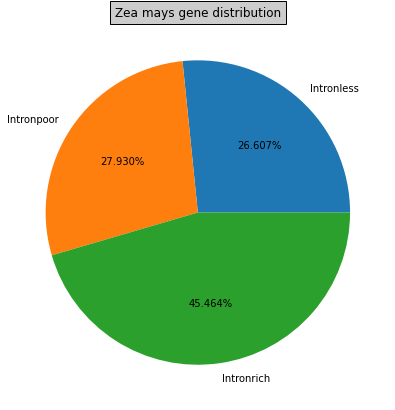

In [215]:
plotting_intron_types(11563, 12138, 19758, 'Zea mays gene distribution')

In [216]:
### --- Creating the list of z_mays gene IDs to check the number of transcripts using command line
intronless_file = open('Output/z_mays_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/z_mays_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/z_mays_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_z_mays)):
    if i == len(intronless_z_mays) -1:
        intronless_file.write(intronless_z_mays[i])
    else:
        intronless_file.write(intronless_z_mays[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_z_mays)):
    if i == len(intronpoor_z_mays) -1:
        intronpoor_file.write(intronpoor_z_mays[i])
    else:
        intronpoor_file.write(intronpoor_z_mays[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_z_mays)):
    if i == len(intronrich_z_mays) -1:
        intronrich_file.write(intronrich_z_mays[i])
    else:
        intronrich_file.write(intronrich_z_mays[i]+'\n')
intronrich_file.close()


# Aegilops Tuschii v5.0

In [217]:
### --- Function to count introns within a dataframe made of exons formatted like exon_a_tauschii_v5
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i] = counts.get(i, 0) + 1
    return counts

In [218]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_a_tauschii_v5 = pd.read_csv('Data/A_tauschii_v5.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_a_tauschii_v5[df_a_tauschii_v5['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
2,Chr1,pgsb,gene,138095132.0,138097675.0,.,-,.,Name=PGSB_gene_4318;ID=PGSB_gene_4318;_Primary_confidence_class=HC
18,Chr1,pgsb,gene,138171801.0,138179764.0,.,-,.,ID=PGSB_gene_4319;_Primary_confidence_class=HC;Name=PGSB_gene_4319
32,Chr1,pgsb,gene,138245099.0,138249905.0,.,-,.,Name=PGSB_gene_4320;_Primary_confidence_class=HC;ID=PGSB_gene_4320
50,Chr1,pgsb,gene,138479323.0,138481541.0,.,+,.,Name=PGSB_gene_4321;_Primary_confidence_class=HC;ID=PGSB_gene_4321
60,Chr1,pgsb,gene,138485376.0,138487256.0,.,+,.,_Primary_confidence_class=LC;ID=PGSB_gene_4322;Name=PGSB_gene_4322
...,...,...,...,...,...,...,...,...,...
541252,Chr7,pgsb,gene,644527607.0,644532034.0,.,-,.,Name=PGSB_gene_68785;_Primary_confidence_class=HC;ID=PGSB_gene_68785
541266,Chr7,pgsb,gene,644571699.0,644578387.0,.,-,.,Name=PGSB_gene_68786;_Primary_confidence_class=LC;ID=PGSB_gene_68786
541288,Chr7,pgsb,gene,644606535.0,644606891.0,.,+,.,Name=PGSB_gene_68787;ID=PGSB_gene_68787;_Primary_confidence_class=LC
541292,Chr7,pgsb,gene,644612419.0,644612736.0,.,+,.,Name=PGSB_gene_68788;ID=PGSB_gene_68788;_Primary_confidence_class=HC


In [219]:
### --- Building a separate dataframe containing all exons
exon_a_tauschii_v5 = df_a_tauschii_v5.loc[df_a_tauschii_v5['type'].isin(['exon'])]
exon_a_tauschii_v5.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,Chr1,pgsb,exon,138095132.0,138095311.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
6,Chr1,pgsb,exon,138096126.0,138096188.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
8,Chr1,pgsb,exon,138096292.0,138096458.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
10,Chr1,pgsb,exon,138096541.0,138096581.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
12,Chr1,pgsb,exon,138096770.0,138096855.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
14,Chr1,pgsb,exon,138097268.0,138097386.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
16,Chr1,pgsb,exon,138097495.0,138097675.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
20,Chr1,pgsb,exon,138171801.0,138171953.0,.,-,.,Parent=evm.model.Aet_chr_1.2517
22,Chr1,pgsb,exon,138172203.0,138172264.0,.,-,.,Parent=evm.model.Aet_chr_1.2517
24,Chr1,pgsb,exon,138172776.0,138172863.0,.,-,.,Parent=evm.model.Aet_chr_1.2517


In [220]:
### --- Exporting the exon dataframe to a tsv file 
exon_a_tauschii_v5.to_csv('Data/A_tauschii_v5_EXON',sep='\t',index=False,header=False)

In [221]:
### --- Counting introns type
introns_dictionary_a_tauschii_v5 = counting_introns_type(exon_a_tauschii_v5)

In [222]:
n_intronless_a_tauschii_v5, n_intronpoor_a_tauschii_v5, n_intronrich_a_tauschii_v5, intronless_a_tauschii_v5, intronpoor_a_tauschii_v5, intronrich_a_tauschii_v5 = splitting_introns_type(introns_dictionary_a_tauschii_v5)

Intronless are: 33748
Intronpoor are: 20795
Intronrich are: 12444


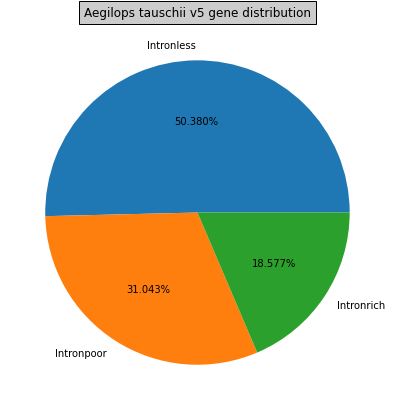

In [223]:
plotting_intron_types(33748, 20795, 12444, 'Aegilops tauschii v5 gene distribution')

In [224]:
### --- Creating the list of a_tauschii_v5 gene IDs to check the number of transcripts using command line
intronless_file = open('Output/a_tauschii_v5_chr_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/a_tauschii_v5_chr_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/a_tauschii_v5_chr_intronrichIDs.txt', 'a')
for i in range(len(intronless_a_tauschii_v5)):
    if i == len(intronless_a_tauschii_v5) -1:
        intronless_file.write(intronless_a_tauschii_v5[i])
    else:
        intronless_file.write(intronless_a_tauschii_v5[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_a_tauschii_v5)):
    if i == len(intronpoor_a_tauschii_v5) -1:
        intronpoor_file.write(intronpoor_a_tauschii_v5[i])
    else:
        intronpoor_file.write(intronpoor_a_tauschii_v5[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_a_tauschii_v5)):
    if i == len(intronrich_a_tauschii_v5) -1:
        intronrich_file.write(intronrich_a_tauschii_v5[i])
    else:
        intronrich_file.write(intronrich_a_tauschii_v5[i]+'\n')
intronrich_file.close()
